# ERM untied exp

In [45]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# run_id = "20251101_102328" # rho = 1
run_id = "20251101_120928" # rho = 0.75

## 1. experiment config

In [46]:
# --- Path to your local folder ---
config_path = f"../results/run_{run_id}/config.csv"

# --- Read the CSV file ---
config = pd.read_csv(config_path)
print(f"⚙️ Config loaded ({len(config)} rows) from {config_path}")

# --- Quick preview ---
display(config)

⚙️ Config loaded (16 rows) from ../results/run_20251101_120928/config.csv


alpha    D  L   rho  rho_star  beta      lam  Delta_in  samples      T  \
0   0.005000  100  2  1.00       0.5   1.0  0.00001       0.5        8  10000   
1   0.115556  100  2  1.00       0.5   1.0  0.00001       0.5        8  10000   
2   0.226111  100  2  1.00       0.5   1.0  0.00001       0.5        8  10000   
3   0.005000  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
4   0.336667  100  2  1.00       0.5   1.0  0.00001       0.5        8  10000   
5   0.447222  100  2  1.00       0.5   1.0  0.00001       0.5        8  10000   
6   0.557778  100  2  1.00       0.5   1.0  0.00001       0.5        8  10000   
7   0.115556  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
8   0.226111  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
9   0.336667  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
10  1.000000  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
11  0.889444  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
12  0.447222  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
13  0.778889  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
14  0.557778  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   
15  0.668333  100  2  0.75       0.5   1.0  0.00001       0.5        8  10000   

    learning_rate  norm_init       tol  N_test  \
0             0.1        1.0  0.000001    2000   
1             0.1        1.0  0.000001    2000   
2             0.1        1.0  0.000001    2000   
3             0.1        1.0  0.000001    2000   
4             0.1        1.0  0.000001    2000   
5             0.1        1.0  0.000001    2000   
6             0.1        1.0  0.000001    2000   
7             0.1        1.0  0.000001    2000   
8             0.1        1.0  0.000001    2000   
9             0.1        1.0  0.000001    2000   
10            0.1        1.0  0.000001    2000   
11            0.1        1.0  0.000001    2000   
12            0.1        1.0  0.000001    2000   
13            0.1        1.0  0.000001    2000   
14            0.1        1.0  0.000001    2000   
15            0.1        1.0  0.000001    2000   

                                             base_dir  
0   /home/peucelle/tpiv-simulations/results/run_20...  
1   /home/peucelle/tpiv-simulations/results/run_20...  
2   /home/peucelle/tpiv-simulations/results/run_20...  
3   /home/peucelle/tpiv-simulations/results/run_20...  
4   /home/peucelle/tpiv-simulations/results/run_20...  
5   /home/peucelle/tpiv-simulations/results/run_20...  
6   /home/peucelle/tpiv-simulations/results/run_20...  
7   /home/peucelle/tpiv-simulations/results/run_20...  
8   /home/peucelle/tpiv-simulations/results/run_20...  
9   /home/peucelle/tpiv-simulations/results/run_20...  
10  /home/peucelle/tpiv-simulations/results/run_20...  
11  /home/peucelle/tpiv-simulations/results/run_20...  
12  /home/peucelle/tpiv-simulations/results/run_20...  
13  /home/peucelle/tpiv-simulations/results/run_20...  
14  /home/peucelle/tpiv-simulations/results/run_20...  
15  /home/peucelle/tpiv-simulations/results/run_20...

## 2. Metric as function of $\alpha$ for different $\rho$

✅ Summary loaded (80 rows) from ../results/run_20251101_120928/summary.csv


alpha  alpha_idx  lam  rho  MSE_mean  MSE_std  label_err_mean  \
0    NaN        NaN  NaN  NaN       NaN      NaN             NaN   
1    NaN        NaN  NaN  NaN       NaN      NaN             NaN   
2    NaN        NaN  NaN  NaN       NaN      NaN             NaN   
3    NaN        NaN  NaN  NaN       NaN      NaN             NaN   
4    NaN        NaN  NaN  NaN       NaN      NaN             NaN   

   label_err_std  label_err_mean_noise  label_err_std_noise  train_data_mean  \
0            NaN                   NaN                  NaN              NaN   
1            NaN                   NaN                  NaN              NaN   
2            NaN                   NaN                  NaN              NaN   
3            NaN                   NaN                  NaN              NaN   
4            NaN                   NaN                  NaN              NaN   

   train_reg_mean  train_total_mean  
0             NaN               NaN  
1             NaN               NaN  
2             NaN               NaN  
3             NaN               NaN  
4             NaN               NaN

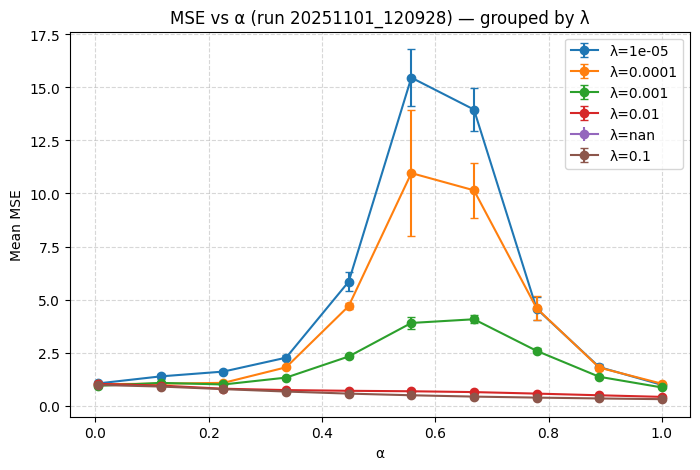

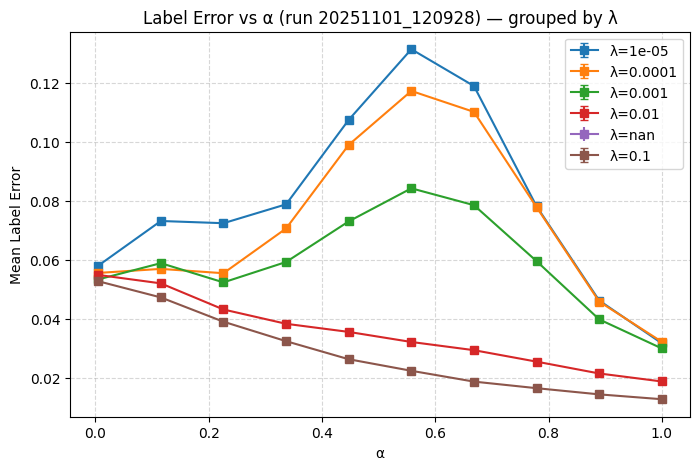

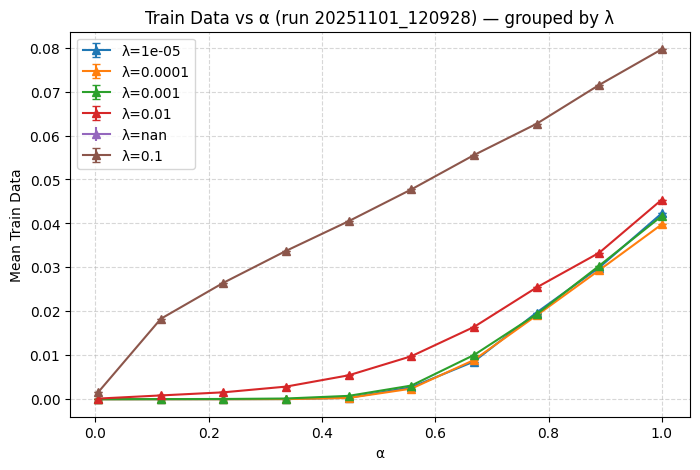

In [47]:
# --- Path to your local folder ---
base_path = f"../results/run_{run_id}/summary.csv"

# --- Read the CSV file ---
df = pd.read_csv(base_path, on_bad_lines='warn')
print(f"✅ Summary loaded ({len(df)} rows) from {base_path}")

# --- Quick preview ---
display(df.head())

# --- Plot MSE vs alpha with error bars (grouped by lambda) ---
plt.figure(figsize=(8, 5))
for lam in sorted(df["lam"].unique()):
    subset = df[df["lam"] == lam].sort_values("alpha")  # Sort by alpha
    plt.errorbar(subset["alpha"], subset["MSE_mean"], yerr=subset.get("MSE_std", 0),
                 marker='o', capsize=3, label=f"λ={lam}")
plt.xlabel("α")
plt.ylabel("Mean MSE")
plt.title(f"MSE vs α (run {run_id}) — grouped by λ")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Plot Label Error vs alpha with error bars (grouped by lambda) ---
plt.figure(figsize=(8, 5))
for lam in sorted(df["lam"].unique()):
    subset = df[df["lam"] == lam].sort_values("alpha")
    plt.errorbar(subset["alpha"], subset["label_err_mean"], yerr=subset.get("label_err_std", 0),
                 marker='s', capsize=3, label=f"λ={lam}")
plt.xlabel("α")
plt.ylabel("Mean Label Error")
plt.title(f"Label Error vs α (run {run_id}) — grouped by λ")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Plot Train Data vs alpha with error bars (grouped by lambda) ---
plt.figure(figsize=(8, 5))
for lam in sorted(df["lam"].unique()):
    subset = df[df["lam"] == lam].sort_values("alpha")
    plt.errorbar(subset["alpha"], subset["train_data_mean"], yerr=subset.get("train_data_std", 0),
                 marker='^', capsize=3, label=f"λ={lam}")
plt.xlabel("α")
plt.ylabel("Mean Train Data")
plt.title(f"Train Data vs α (run {run_id}) — grouped by λ")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## 3. Eigenvalue distributions per $\rho$

Found 10 W_Q files and 10 W_K files.

Processing Q matrices: W_Q_runs_0.pkl


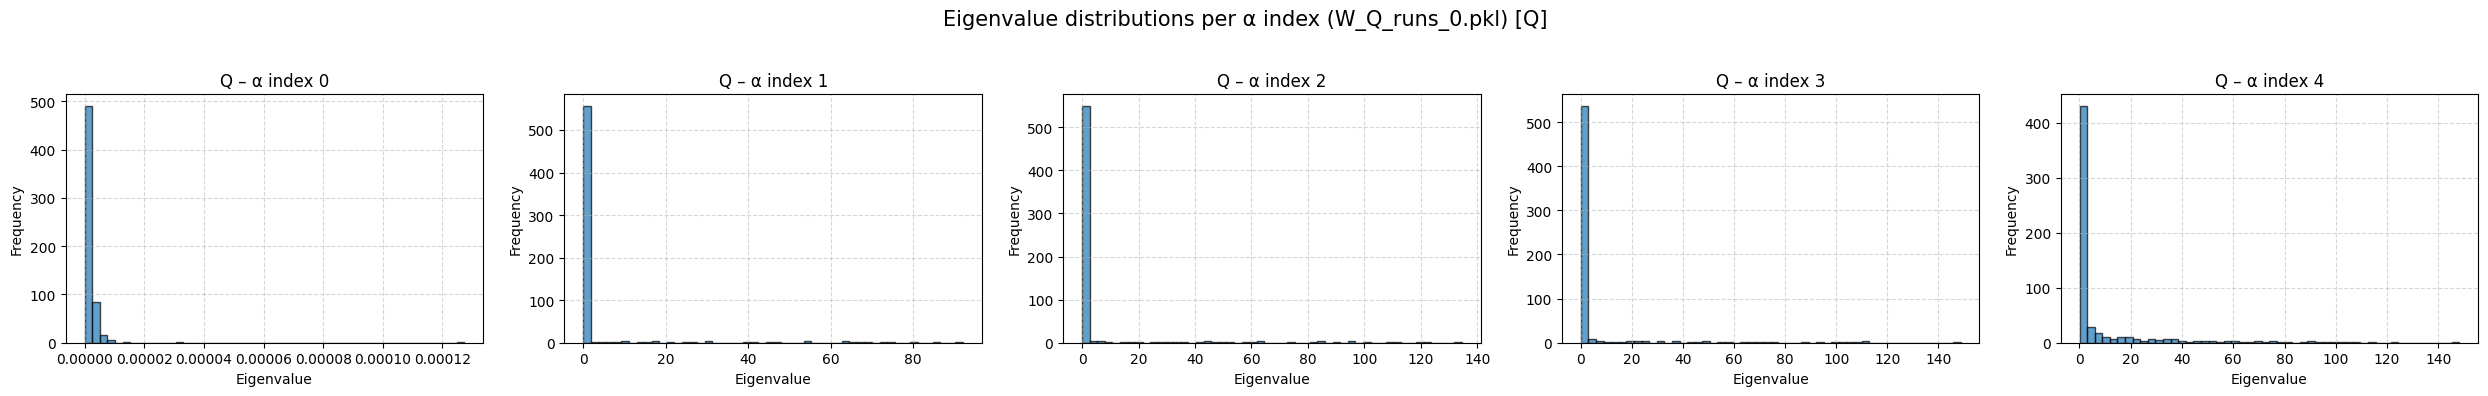


Processing Q matrices: W_Q_runs_1.pkl


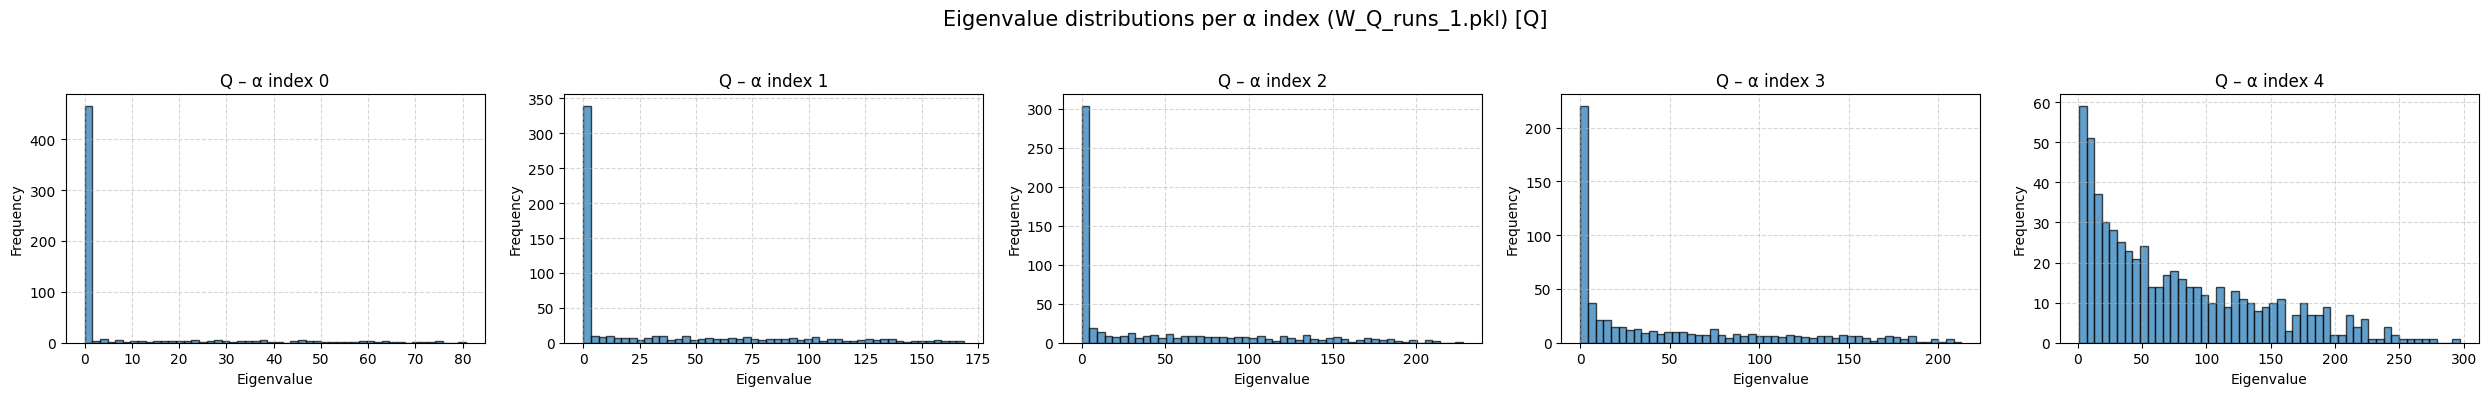


Processing Q matrices: W_Q_runs_2.pkl


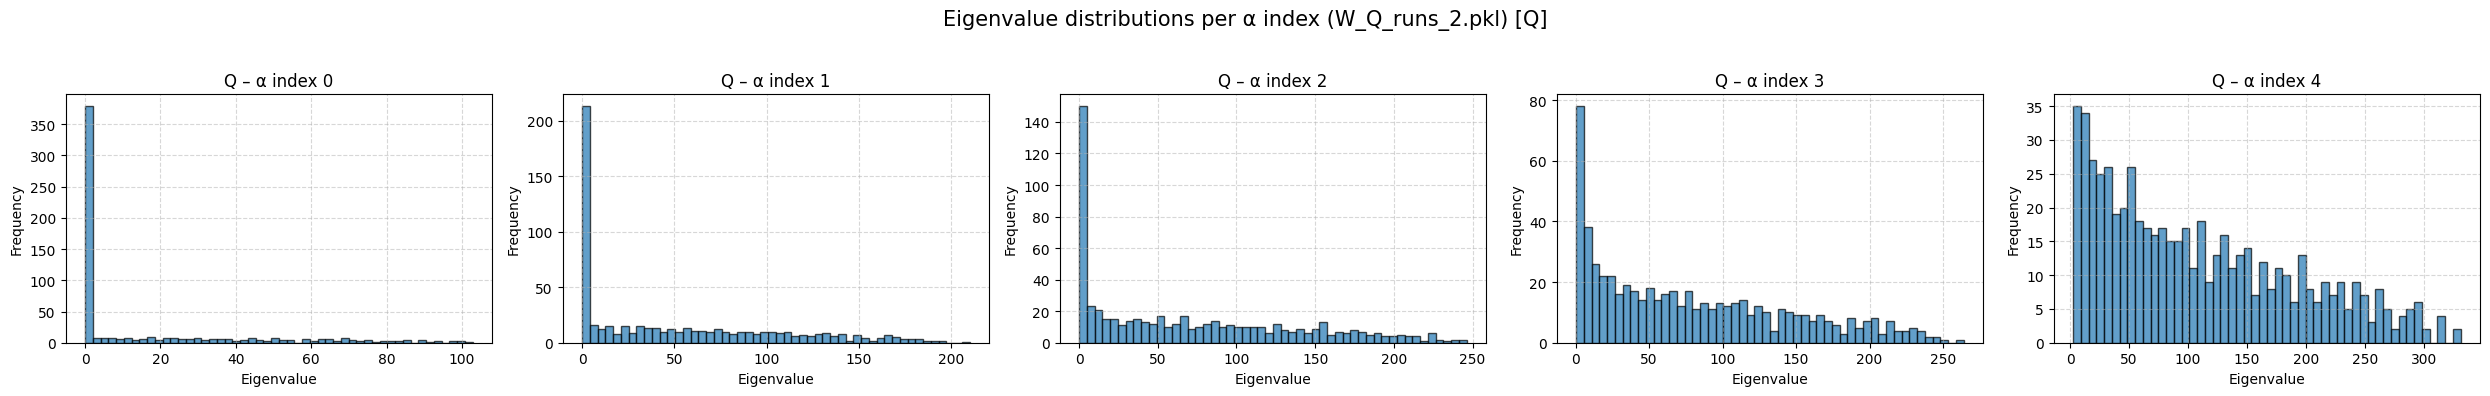


Processing Q matrices: W_Q_runs_3.pkl


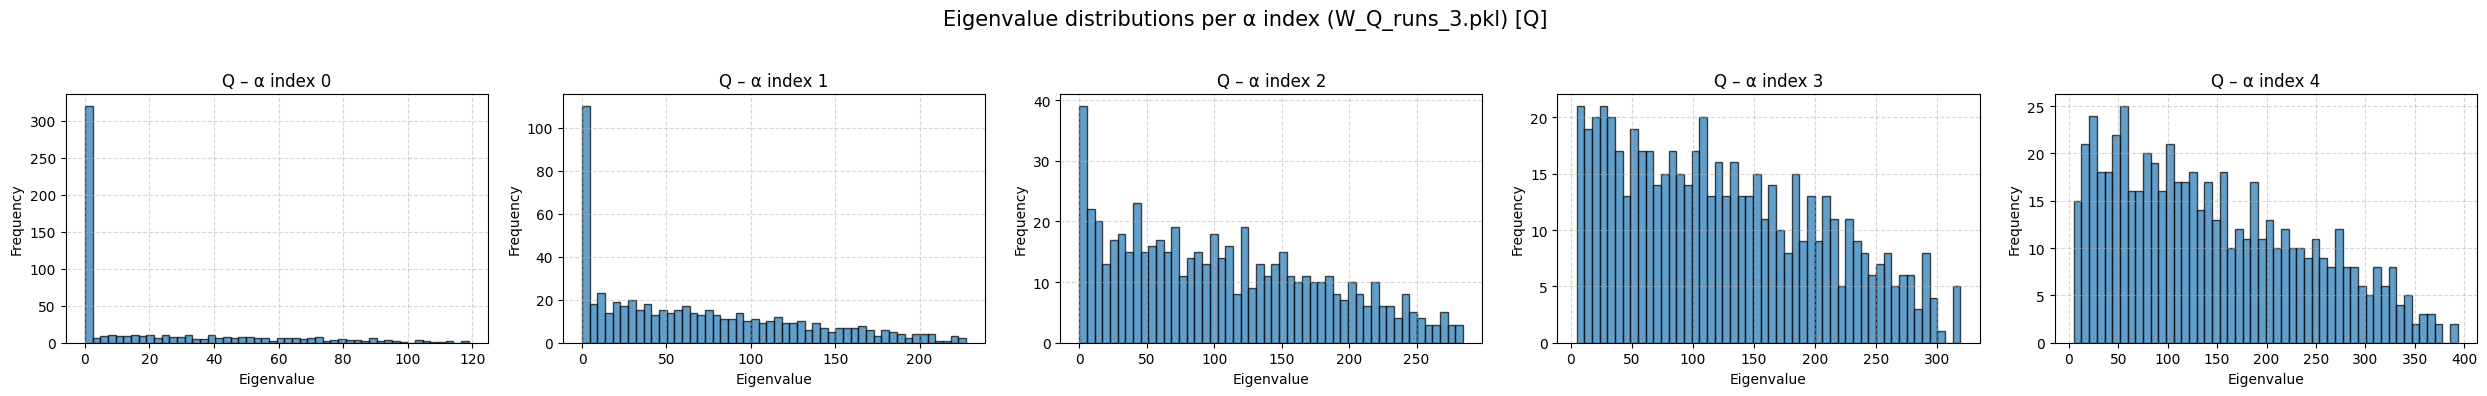


Processing Q matrices: W_Q_runs_4.pkl


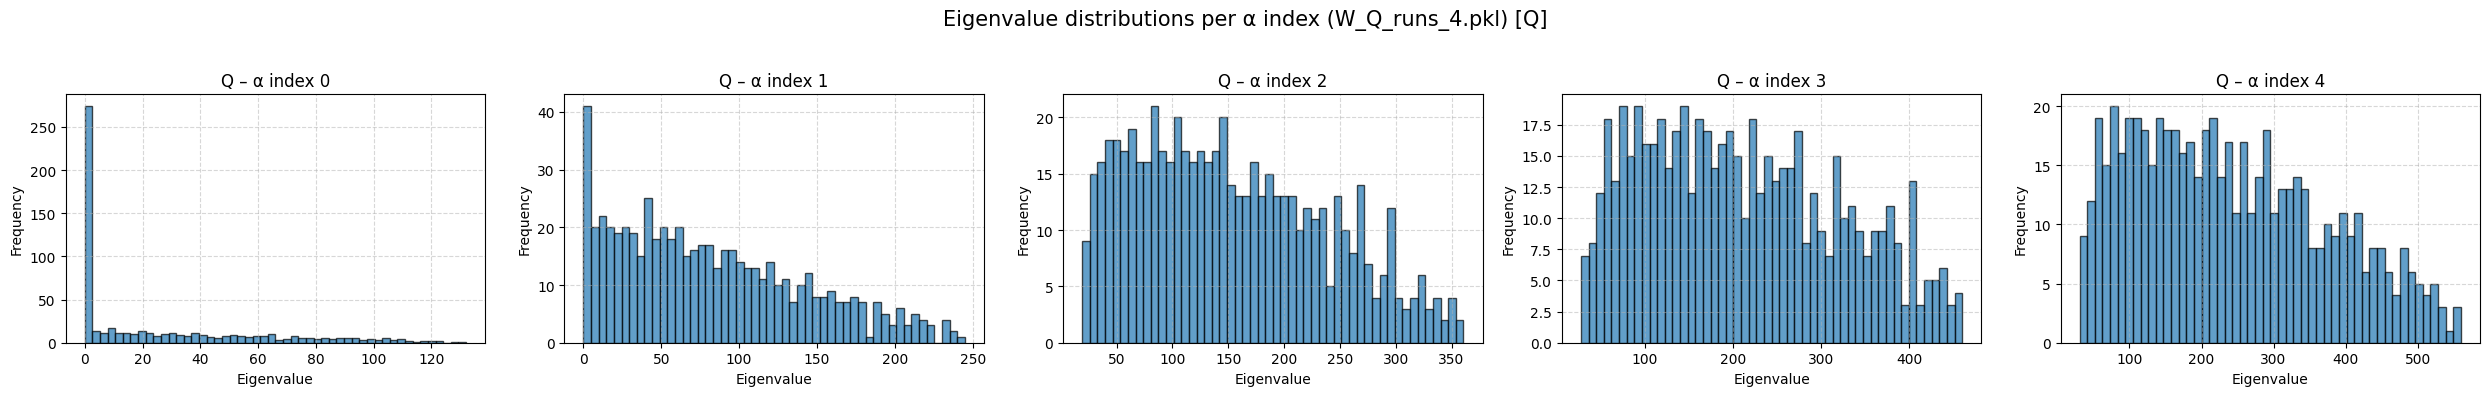


Processing Q matrices: W_Q_runs_5.pkl


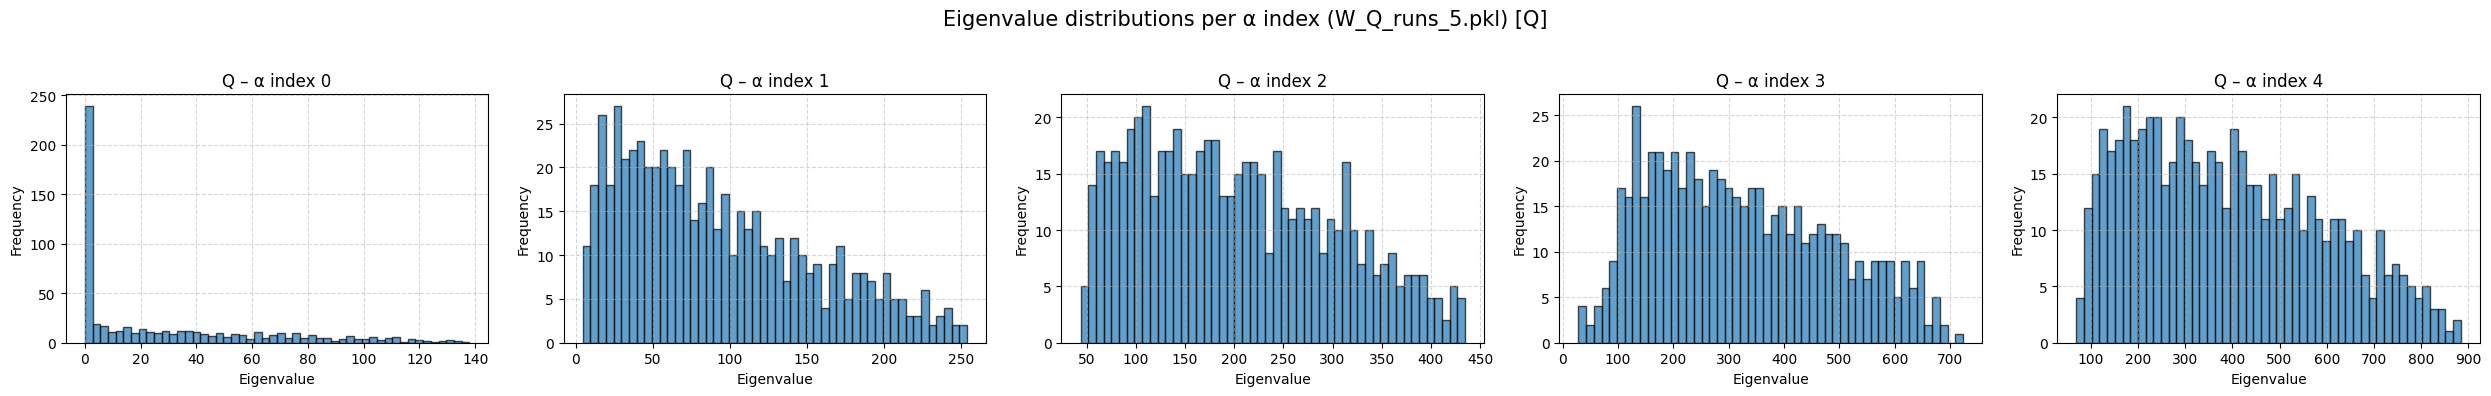


Processing Q matrices: W_Q_runs_6.pkl


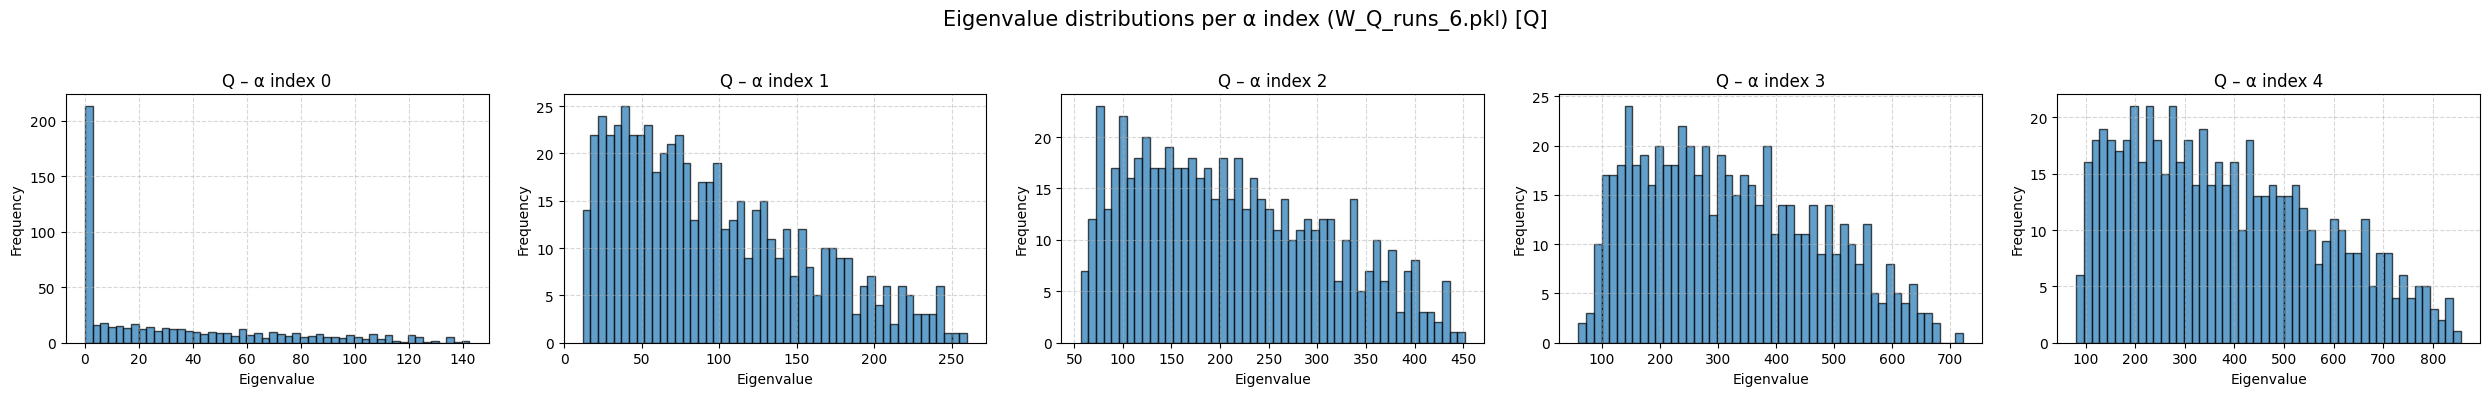


Processing Q matrices: W_Q_runs_7.pkl


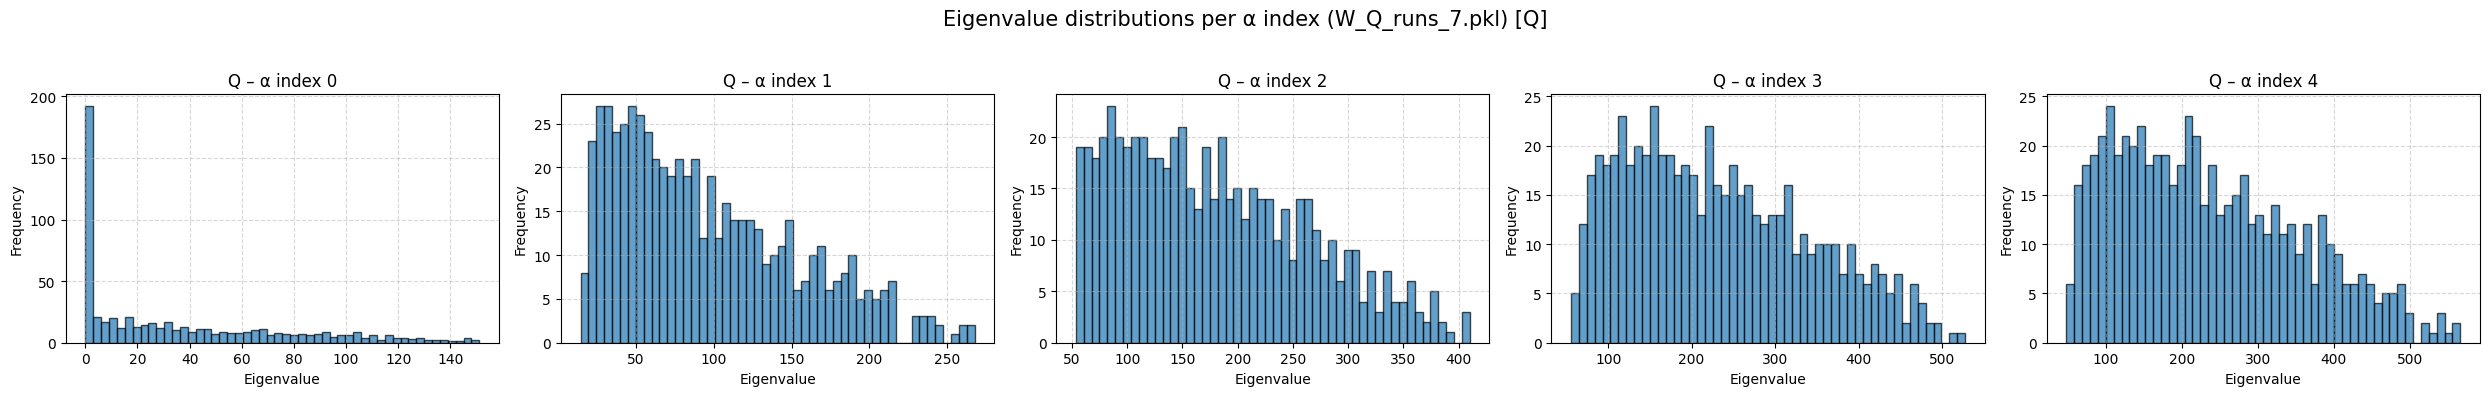


Processing Q matrices: W_Q_runs_8.pkl


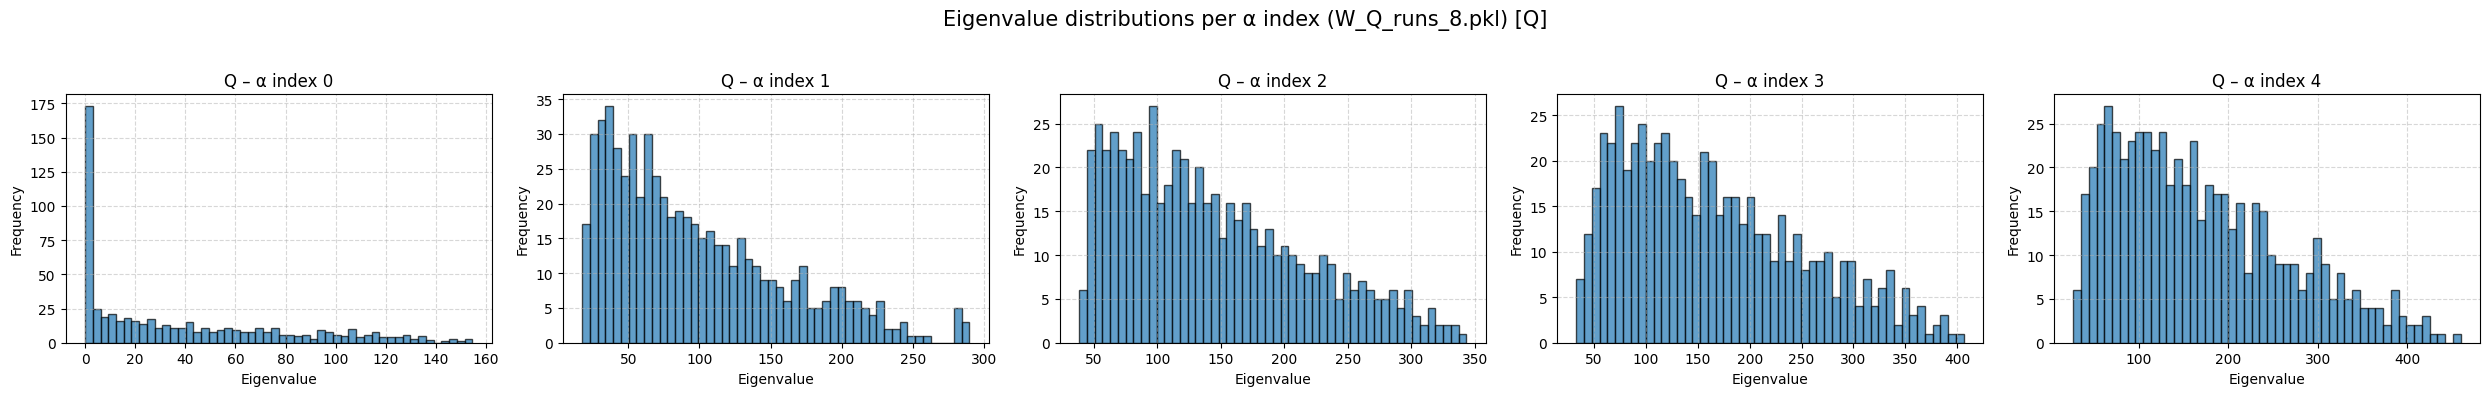


Processing Q matrices: W_Q_runs_9.pkl


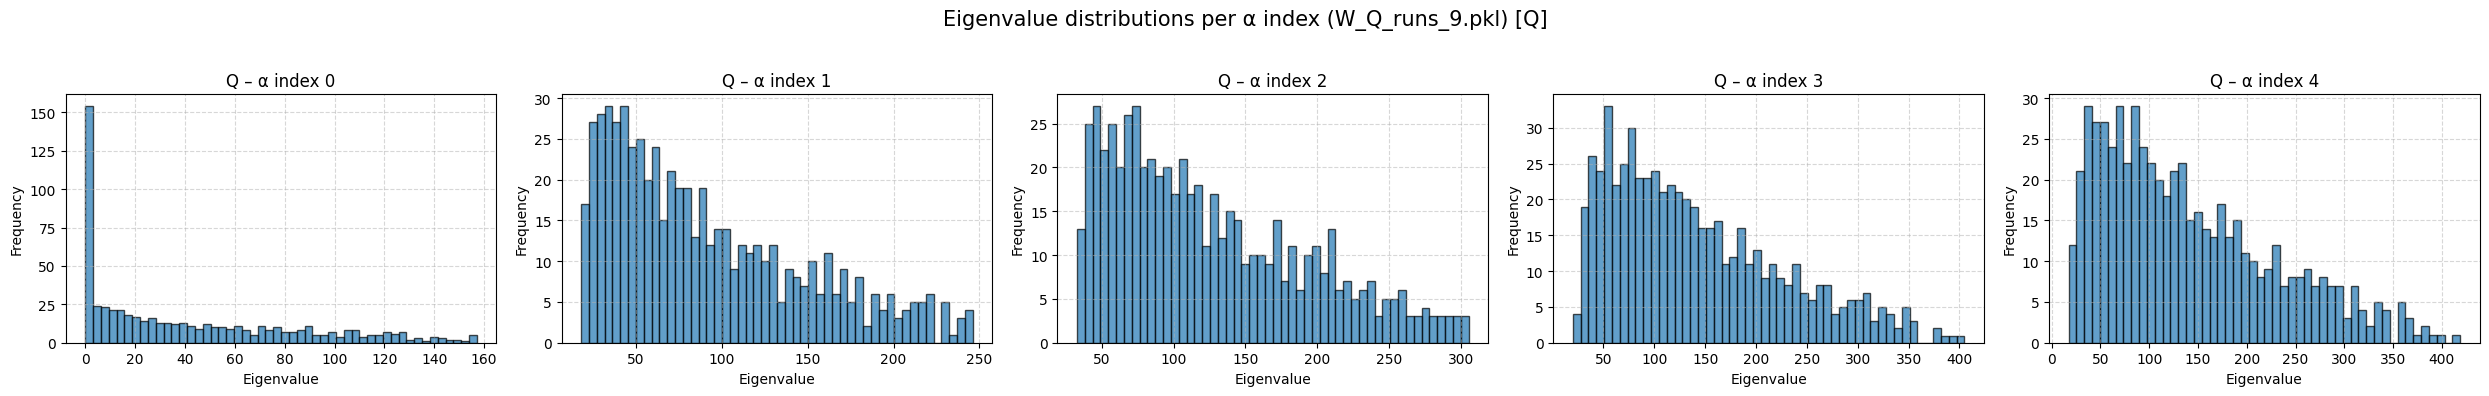


Processing K matrices: W_K_runs_0.pkl


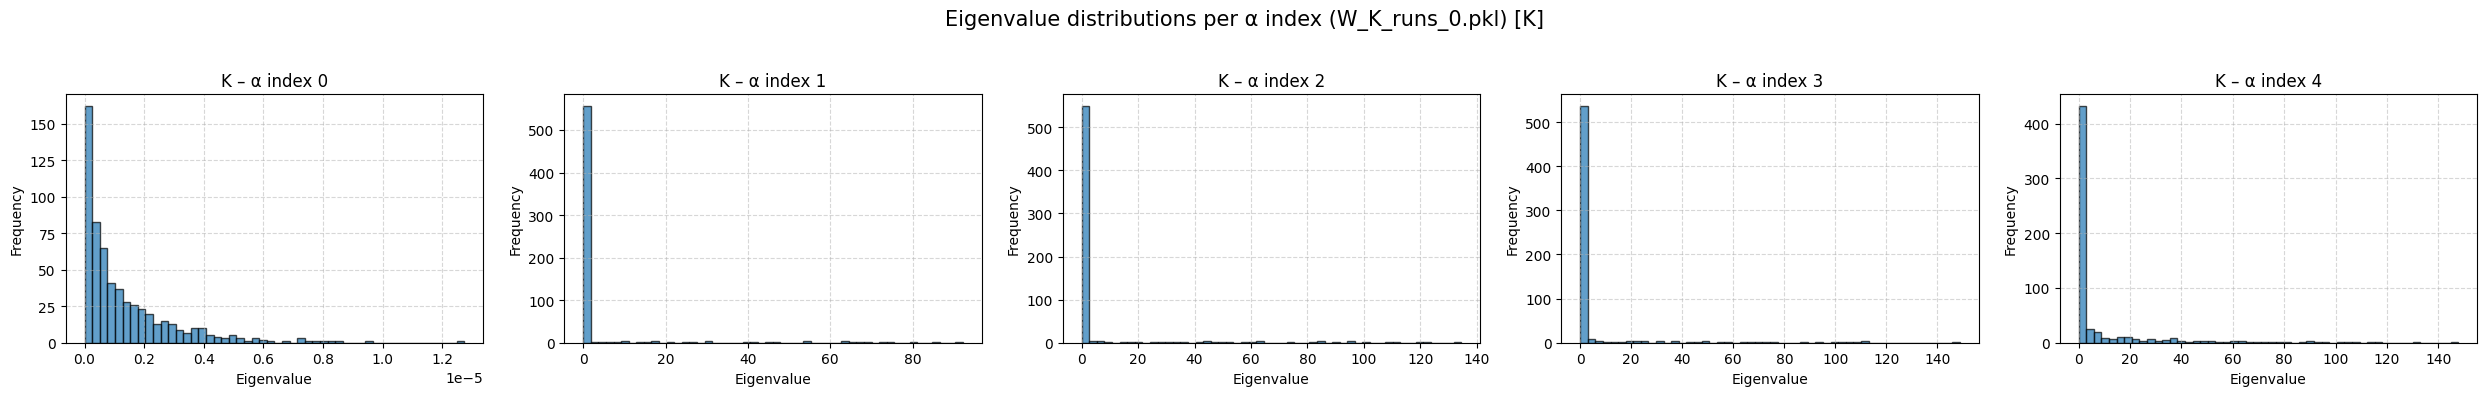


Processing K matrices: W_K_runs_1.pkl


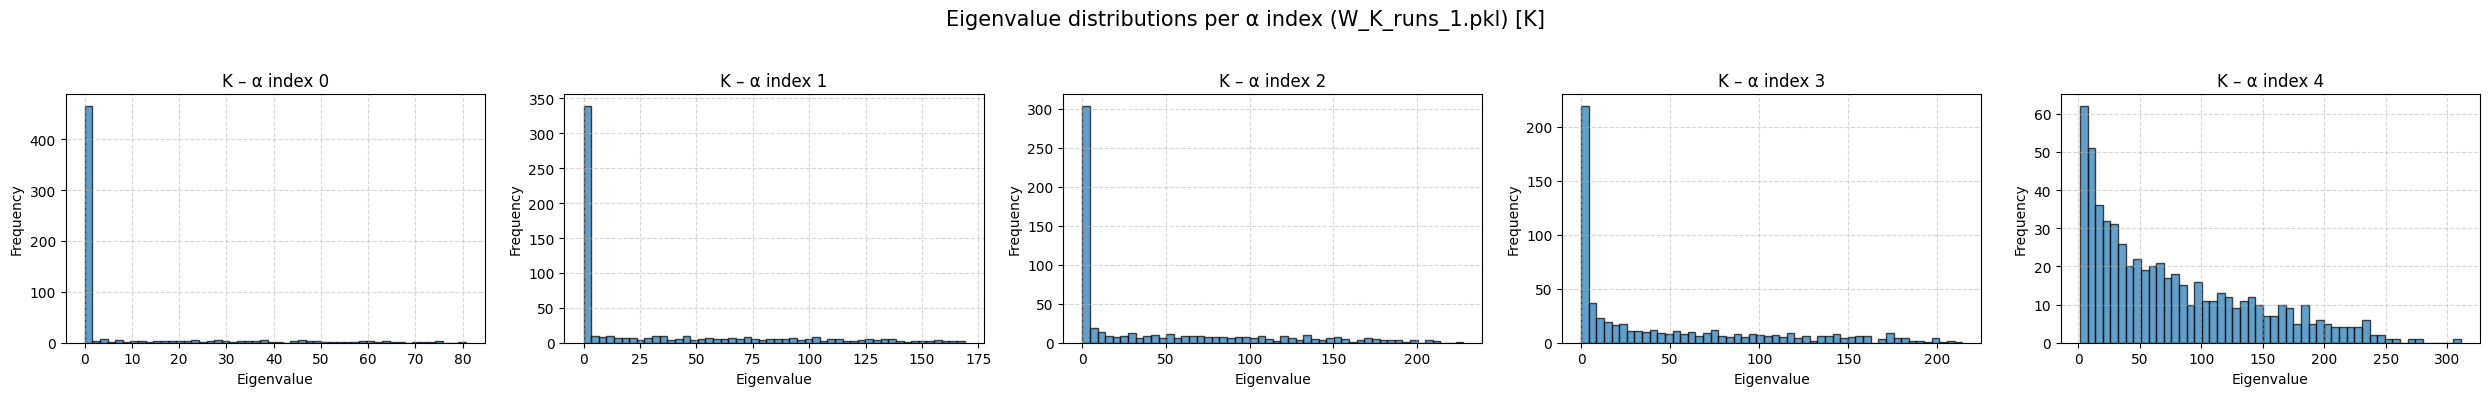


Processing K matrices: W_K_runs_2.pkl


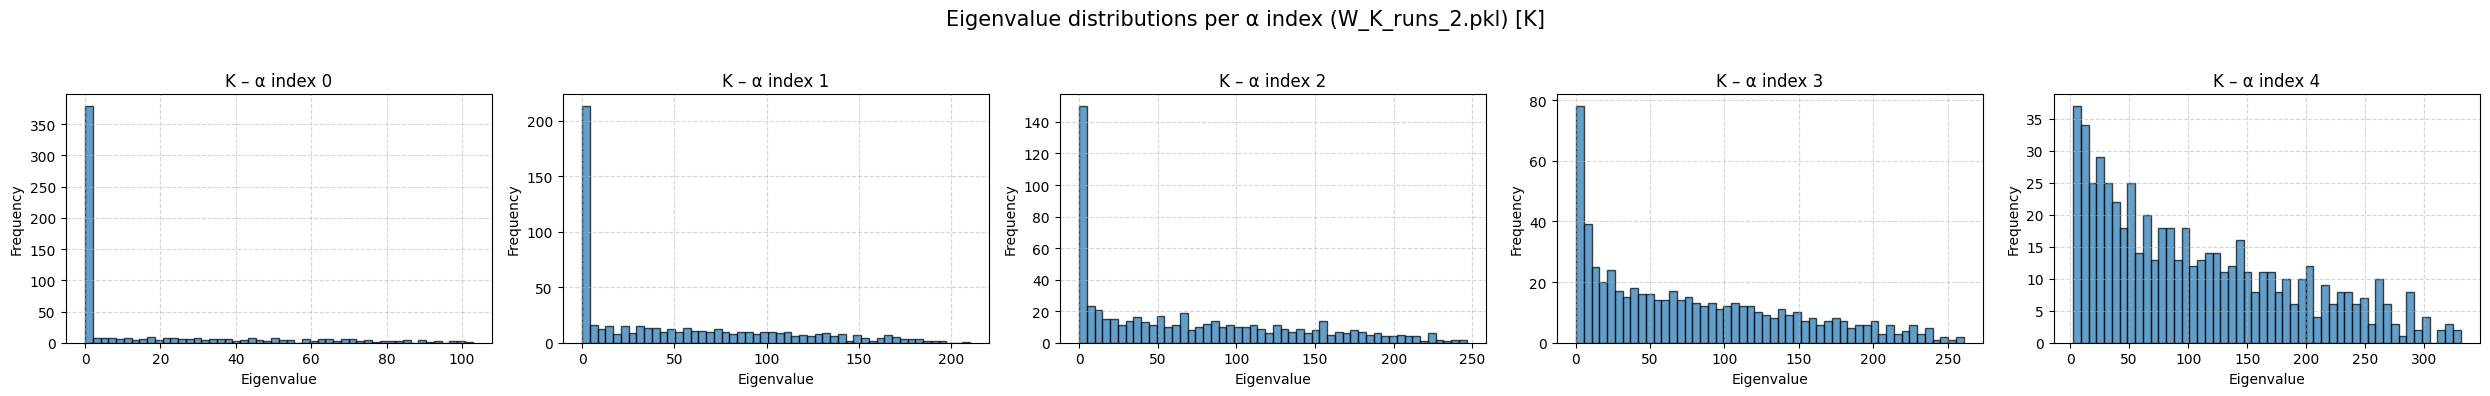


Processing K matrices: W_K_runs_3.pkl


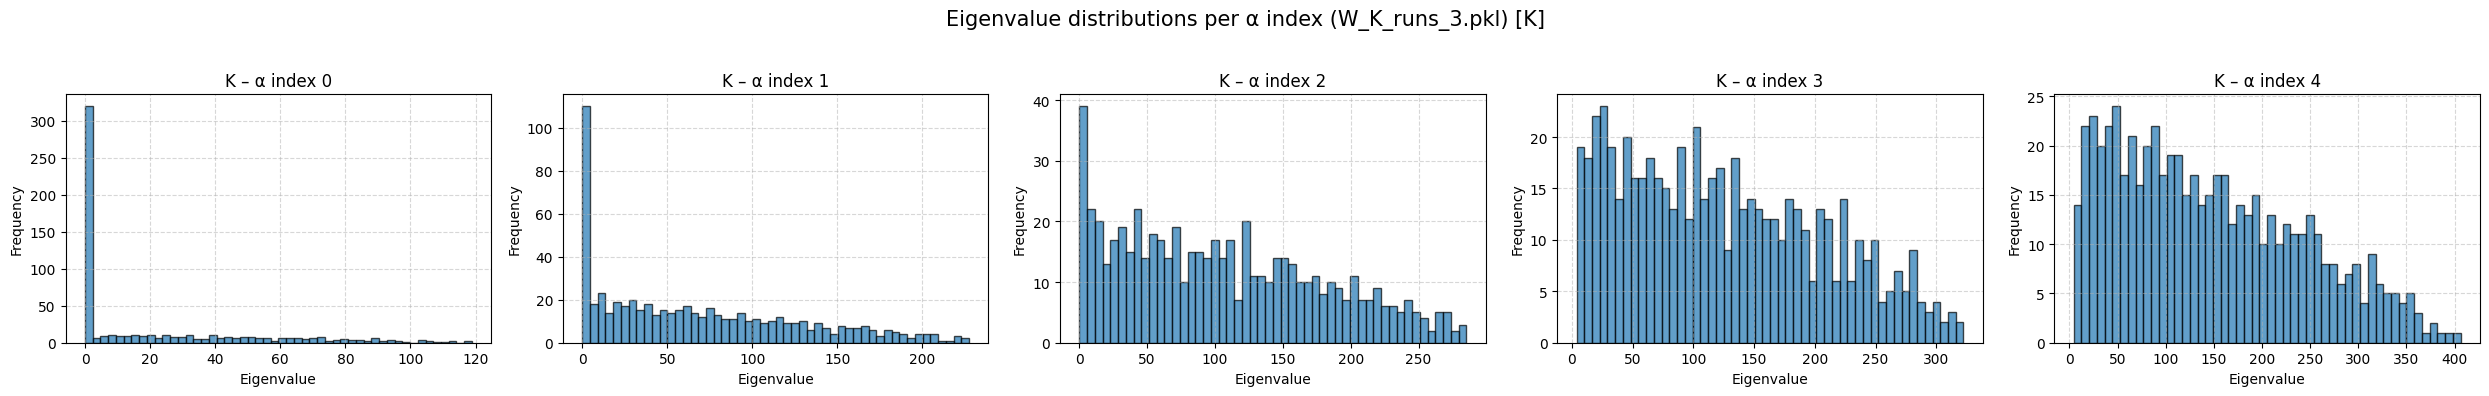


Processing K matrices: W_K_runs_4.pkl


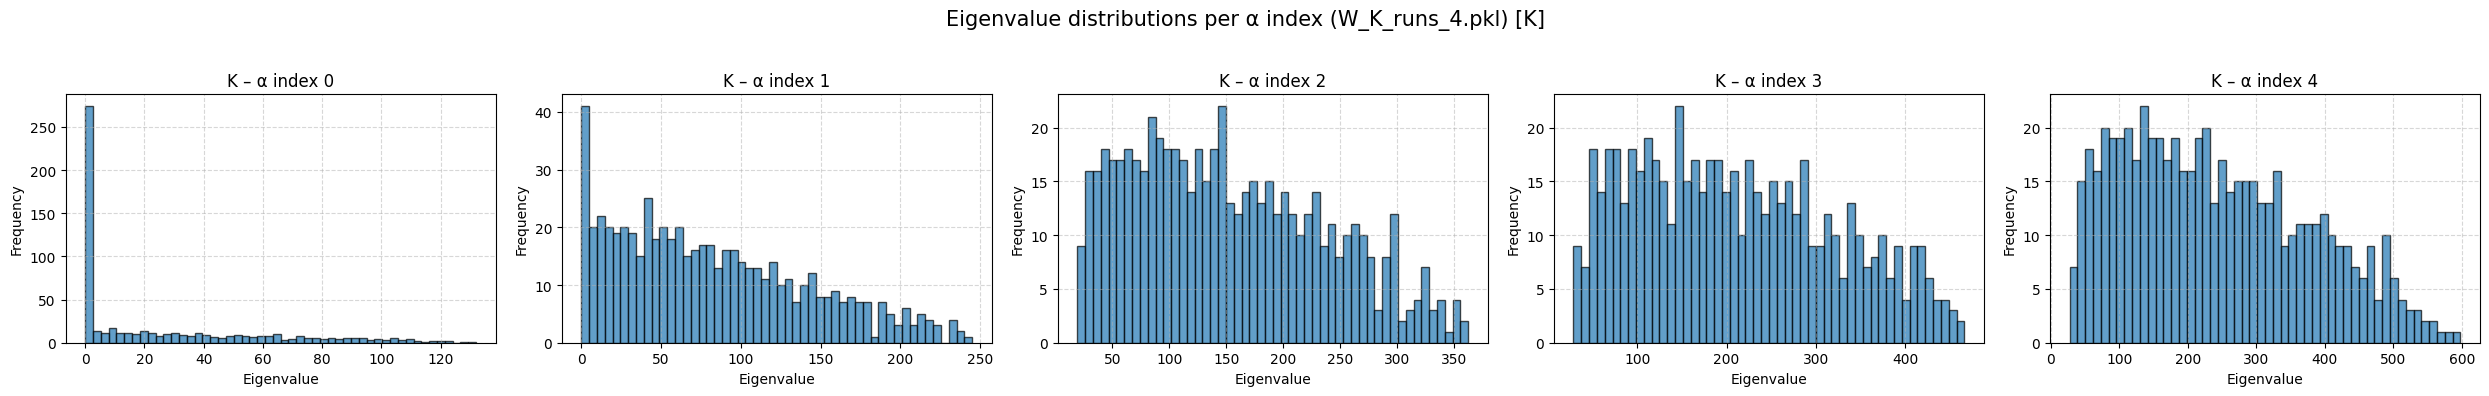


Processing K matrices: W_K_runs_5.pkl


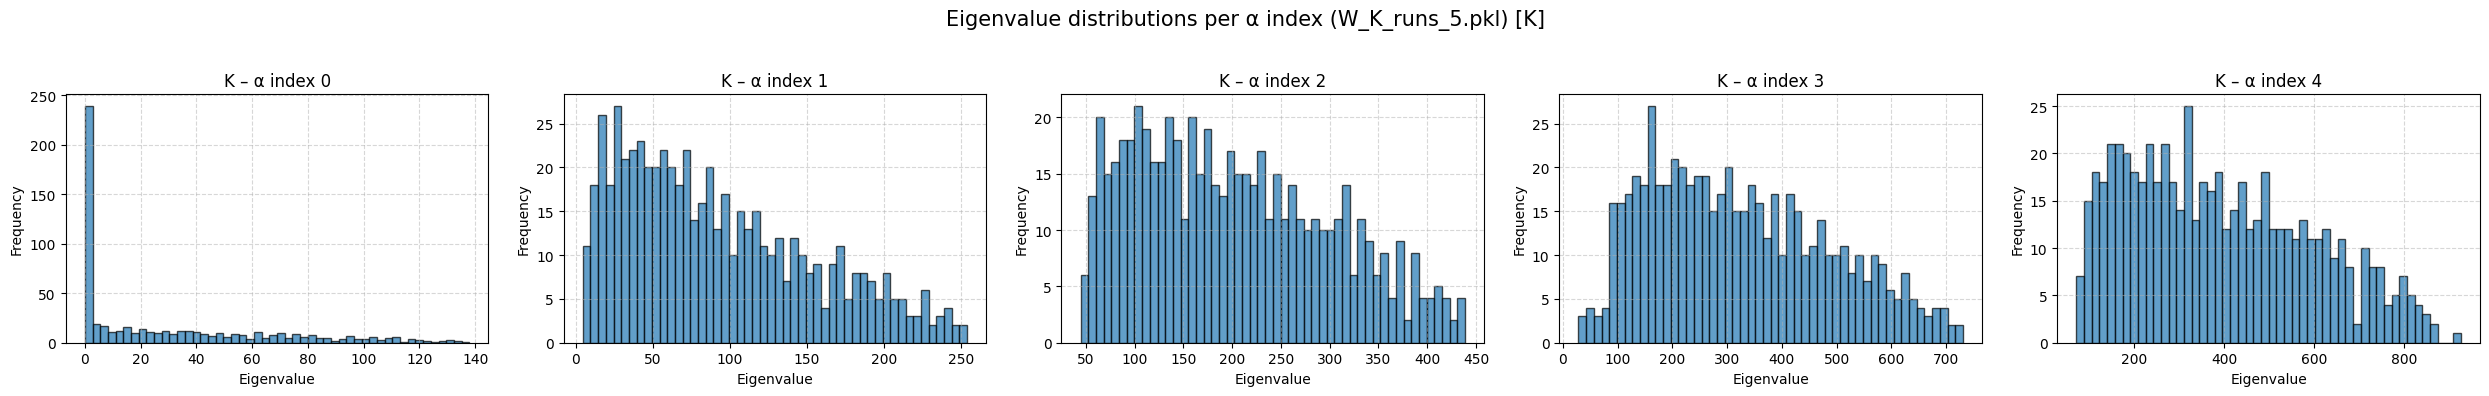


Processing K matrices: W_K_runs_6.pkl


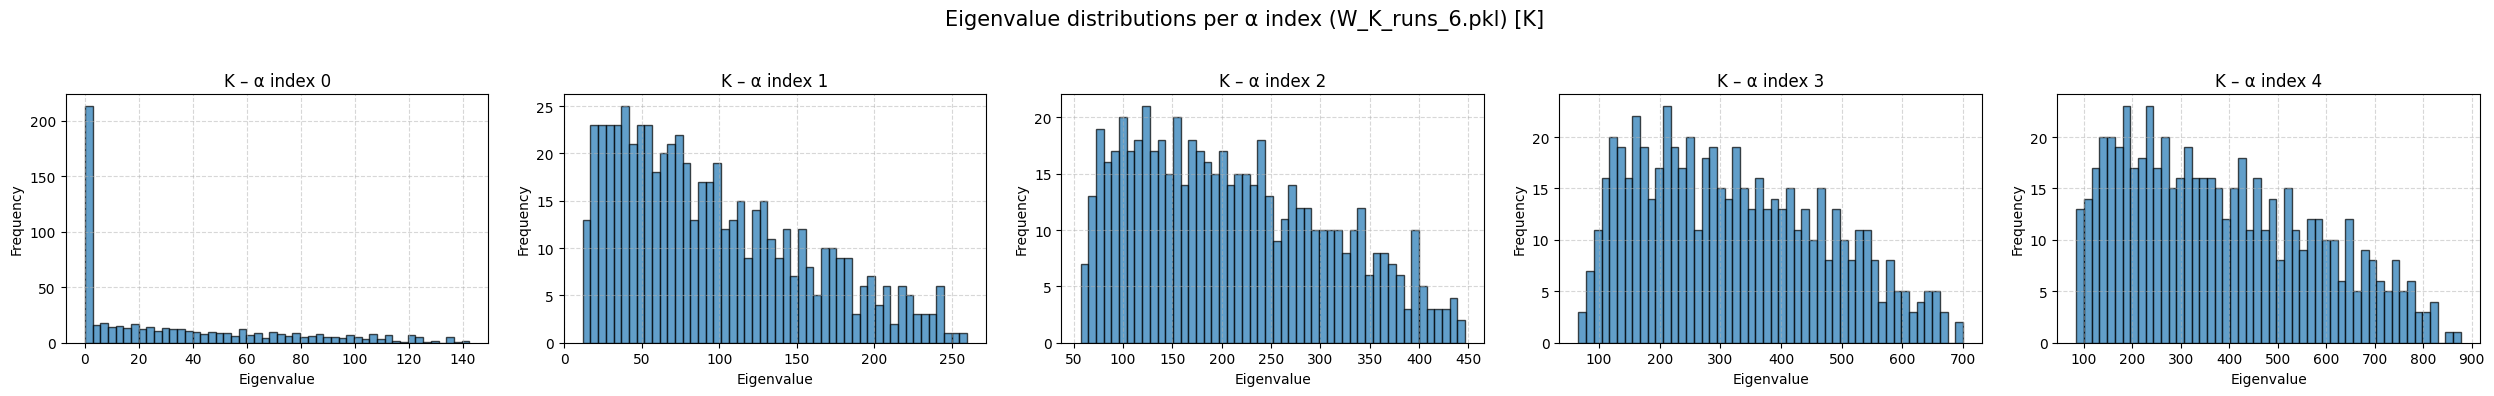


Processing K matrices: W_K_runs_7.pkl


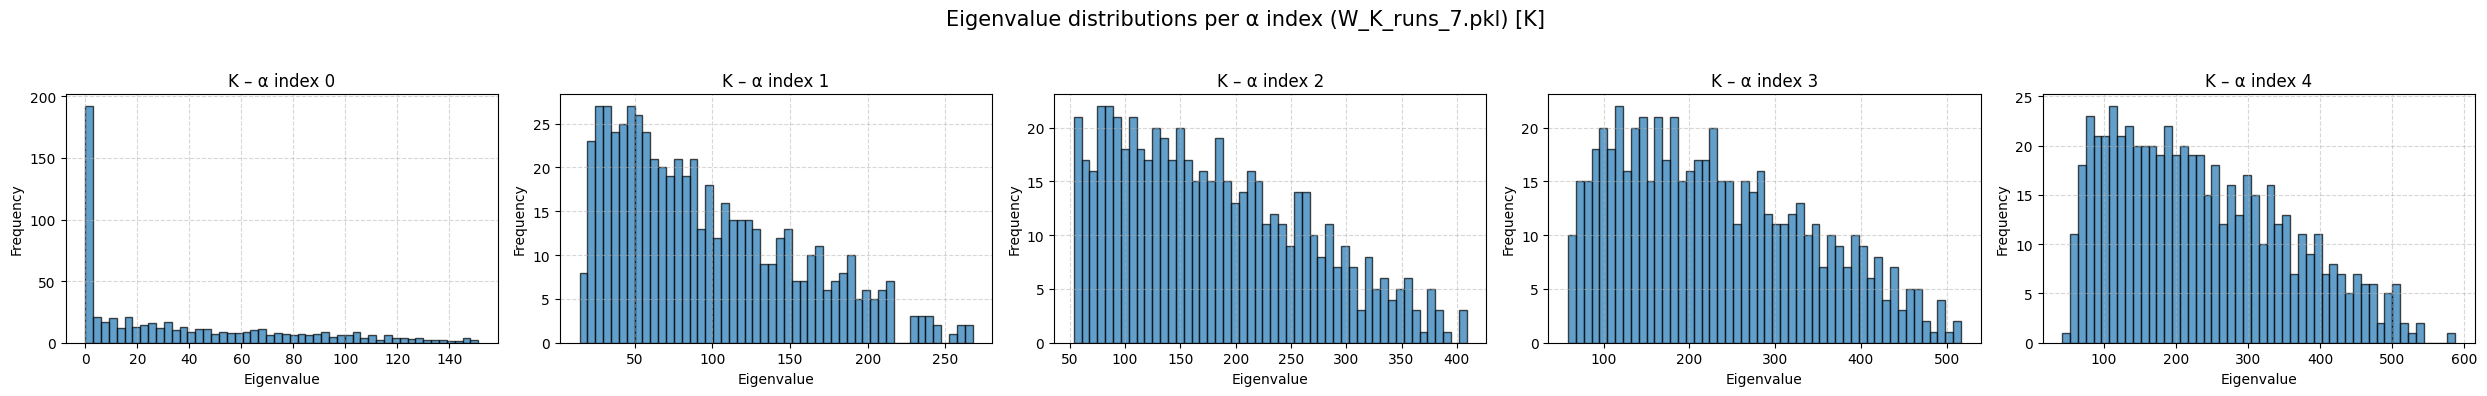


Processing K matrices: W_K_runs_8.pkl


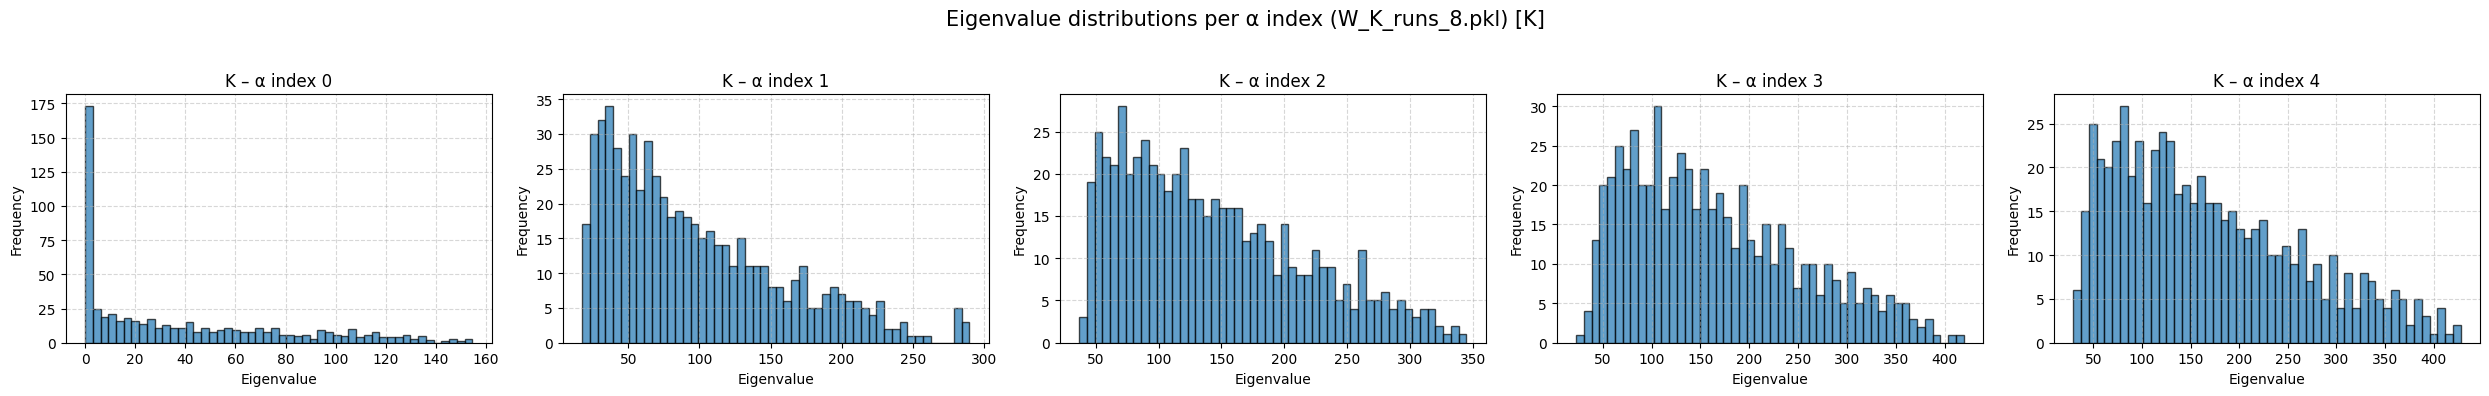


Processing K matrices: W_K_runs_9.pkl


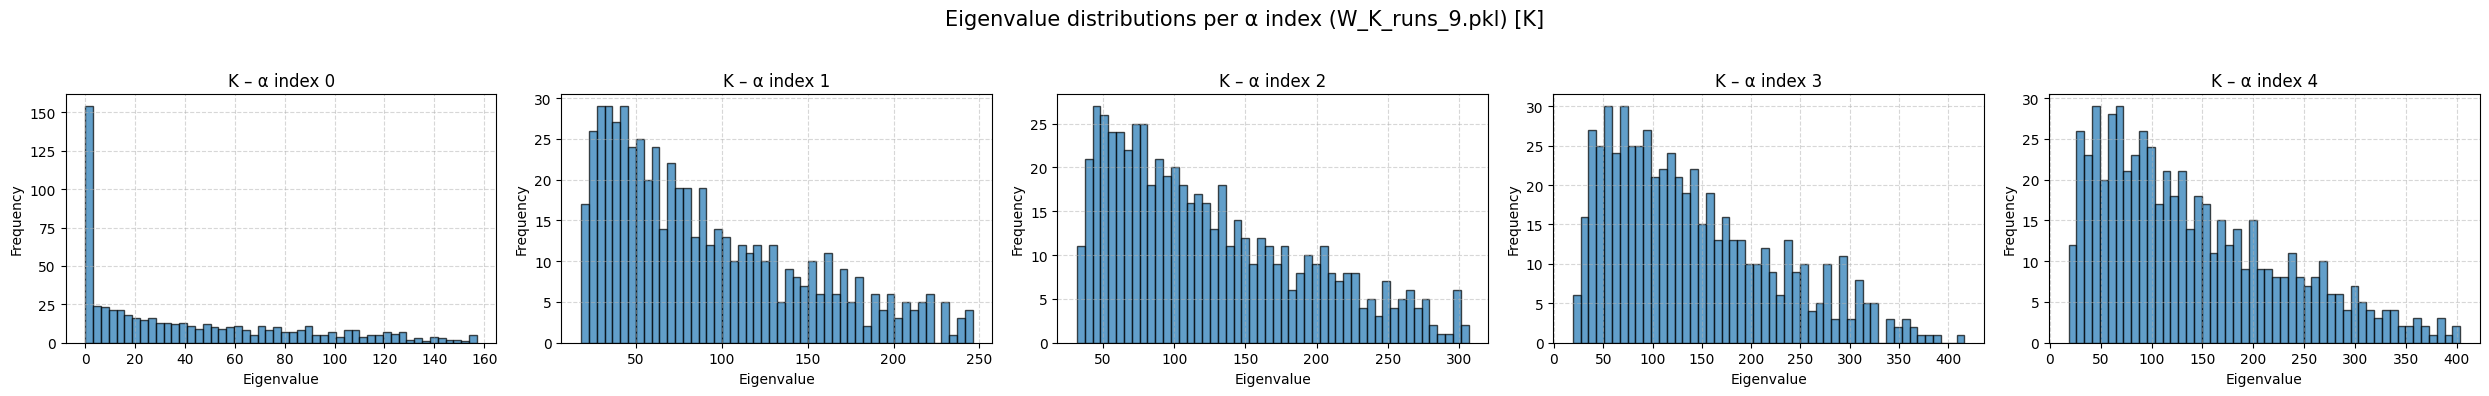

In [48]:
# --- Path to your results directory ---
run_dir = f"../results/run_{run_id}"  # replace with your run_id

# --- Find all pickle files ---
pkl_Q_files = sorted(glob.glob(os.path.join(run_dir, "W_Q_runs_*.pkl")))
pkl_K_files = sorted(glob.glob(os.path.join(run_dir, "W_K_runs_*.pkl")))

print(f"Found {len(pkl_Q_files)} W_Q files and {len(pkl_K_files)} W_K files.")

# --- Helper function to plot a given W_* file ---
def plot_W_spectra(pkl_file, label_type="Q"):
    with open(pkl_file, "rb") as f:
        W_runs_all = pickle.load(f)  # List of W lists per α index

    num_alpha = len(W_runs_all)
    fig, axes = plt.subplots(1, num_alpha, figsize=(5*num_alpha, 4), squeeze=False)

    for i, W_list in enumerate(W_runs_all):
        all_eigvals_i = []
        for W in W_list:
            eigvals = np.linalg.eigvalsh(W @ W.T)
            all_eigvals_i.extend(eigvals)

        all_eigvals_i = np.array(all_eigvals_i)
        ax = axes[0, i]
        ax.hist(all_eigvals_i, bins=50, alpha=0.7, edgecolor='black')
        ax.set_xlabel("Eigenvalue")
        ax.set_ylabel("Frequency")
        ax.set_title(f"{label_type} – α index {i}")
        ax.grid(True, linestyle="--", alpha=0.5)

    fig.suptitle(f"Eigenvalue distributions per α index ({os.path.basename(pkl_file)}) [{label_type}]", fontsize=15)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Plot all W_Q_runs_*.pkl files ---
for pkl_file in pkl_Q_files:
    print(f"\nProcessing Q matrices: {os.path.basename(pkl_file)}")
    plot_W_spectra(pkl_file, label_type="Q")

# --- Plot all W_K_runs_*.pkl files ---
for pkl_file in pkl_K_files:
    print(f"\nProcessing K matrices: {os.path.basename(pkl_file)}")
    plot_W_spectra(pkl_file, label_type="K")


Comparing Q vs K for W_Q_runs_0.pkl


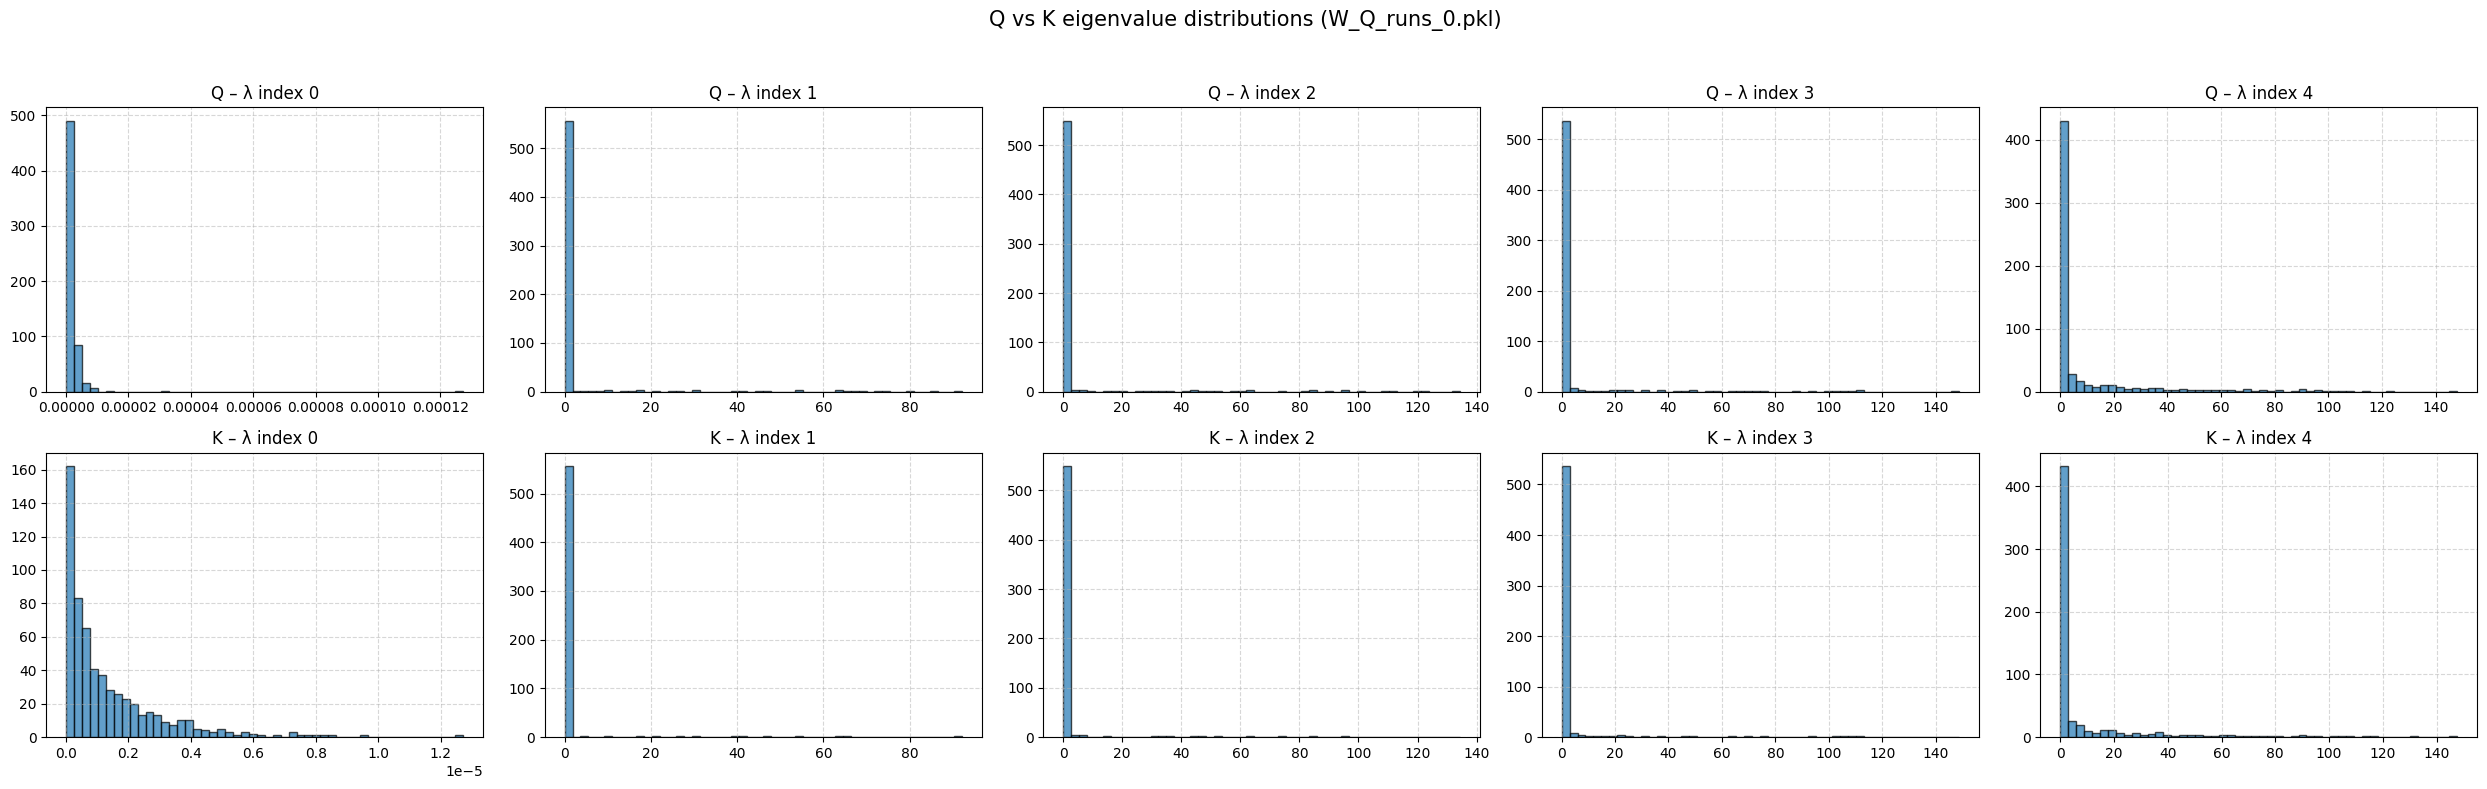


Comparing Q vs K for W_Q_runs_1.pkl


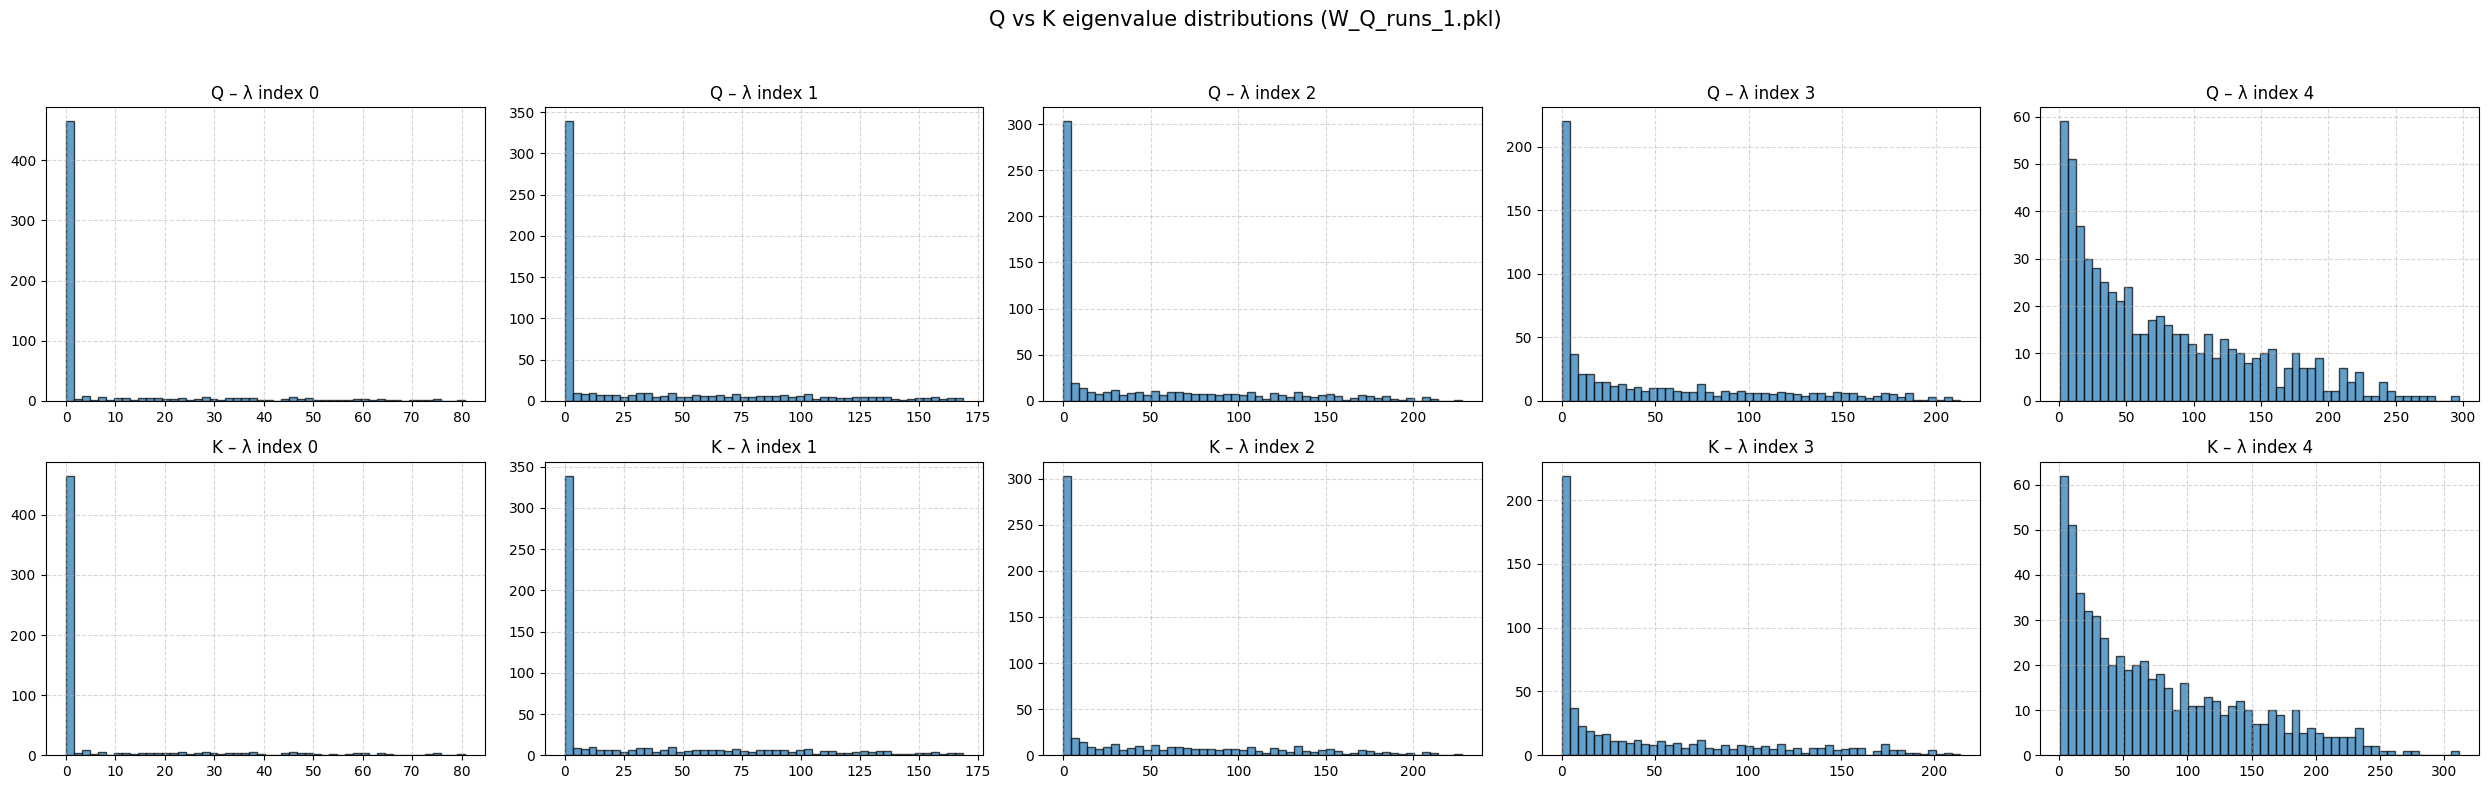


Comparing Q vs K for W_Q_runs_2.pkl


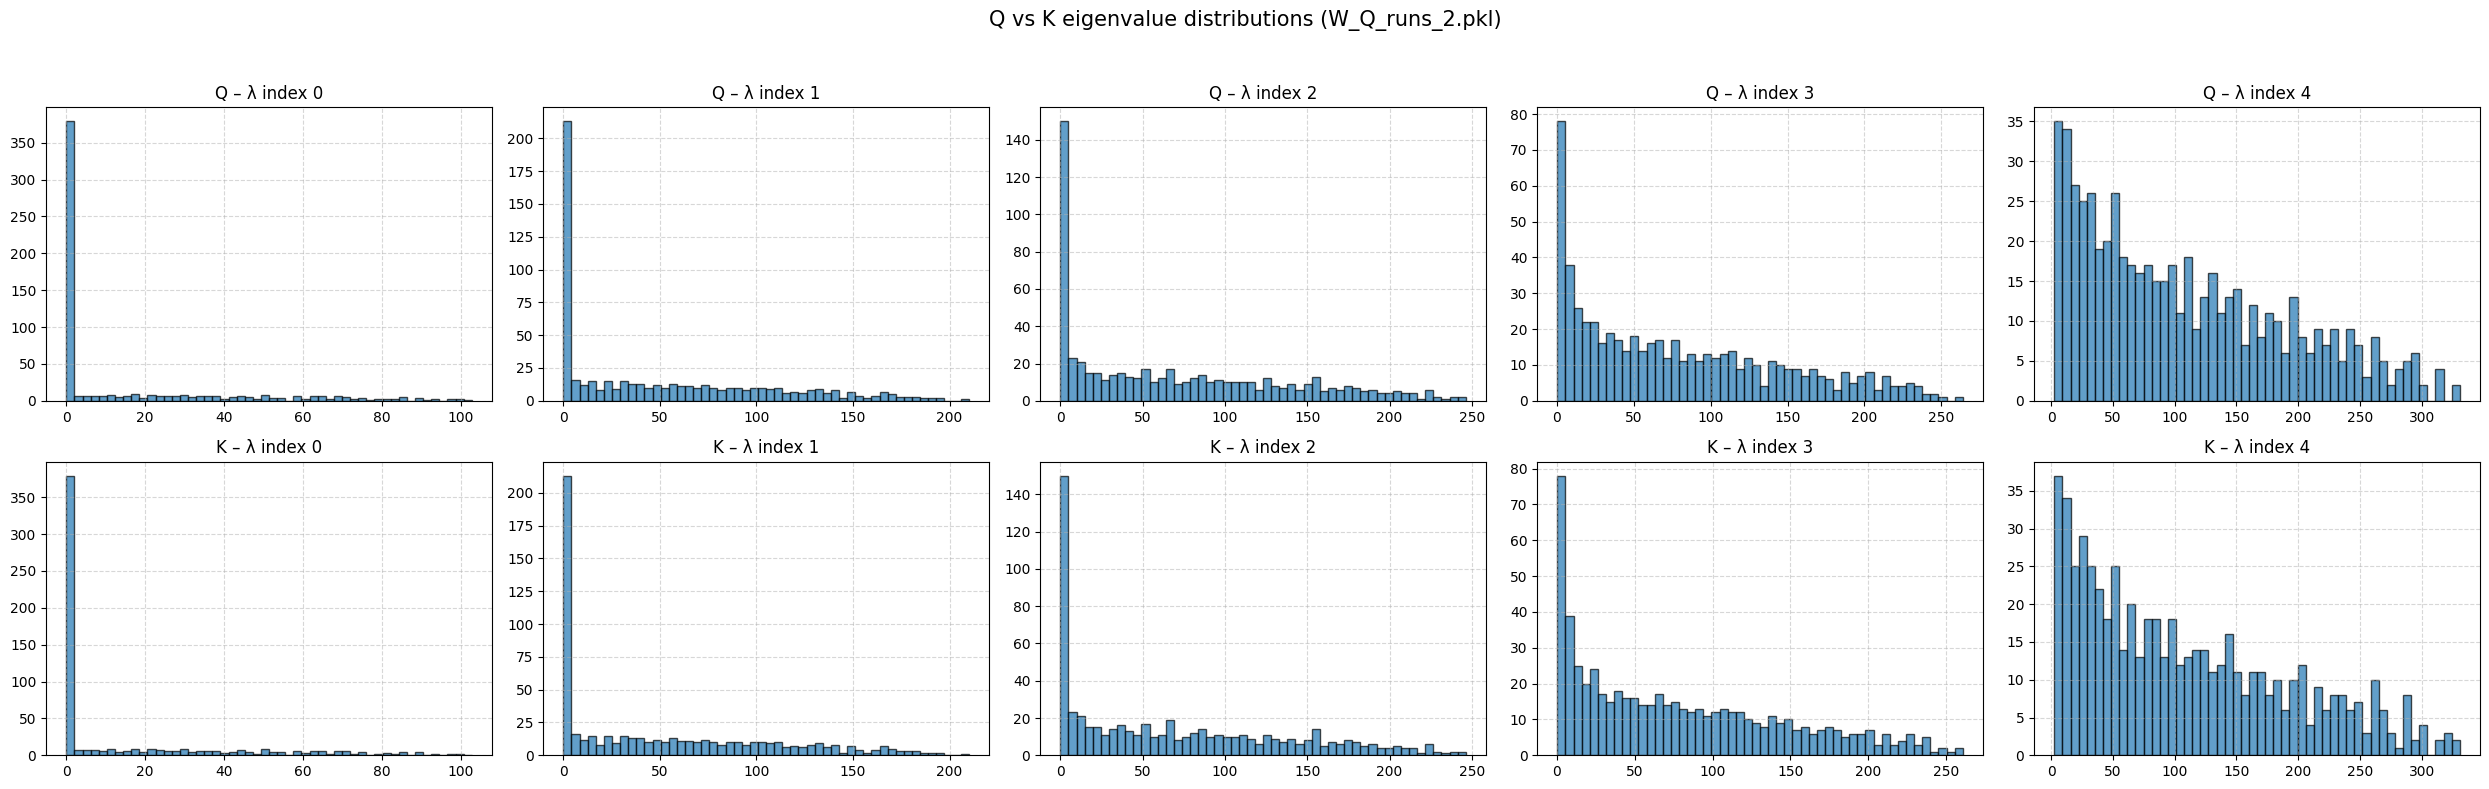


Comparing Q vs K for W_Q_runs_3.pkl


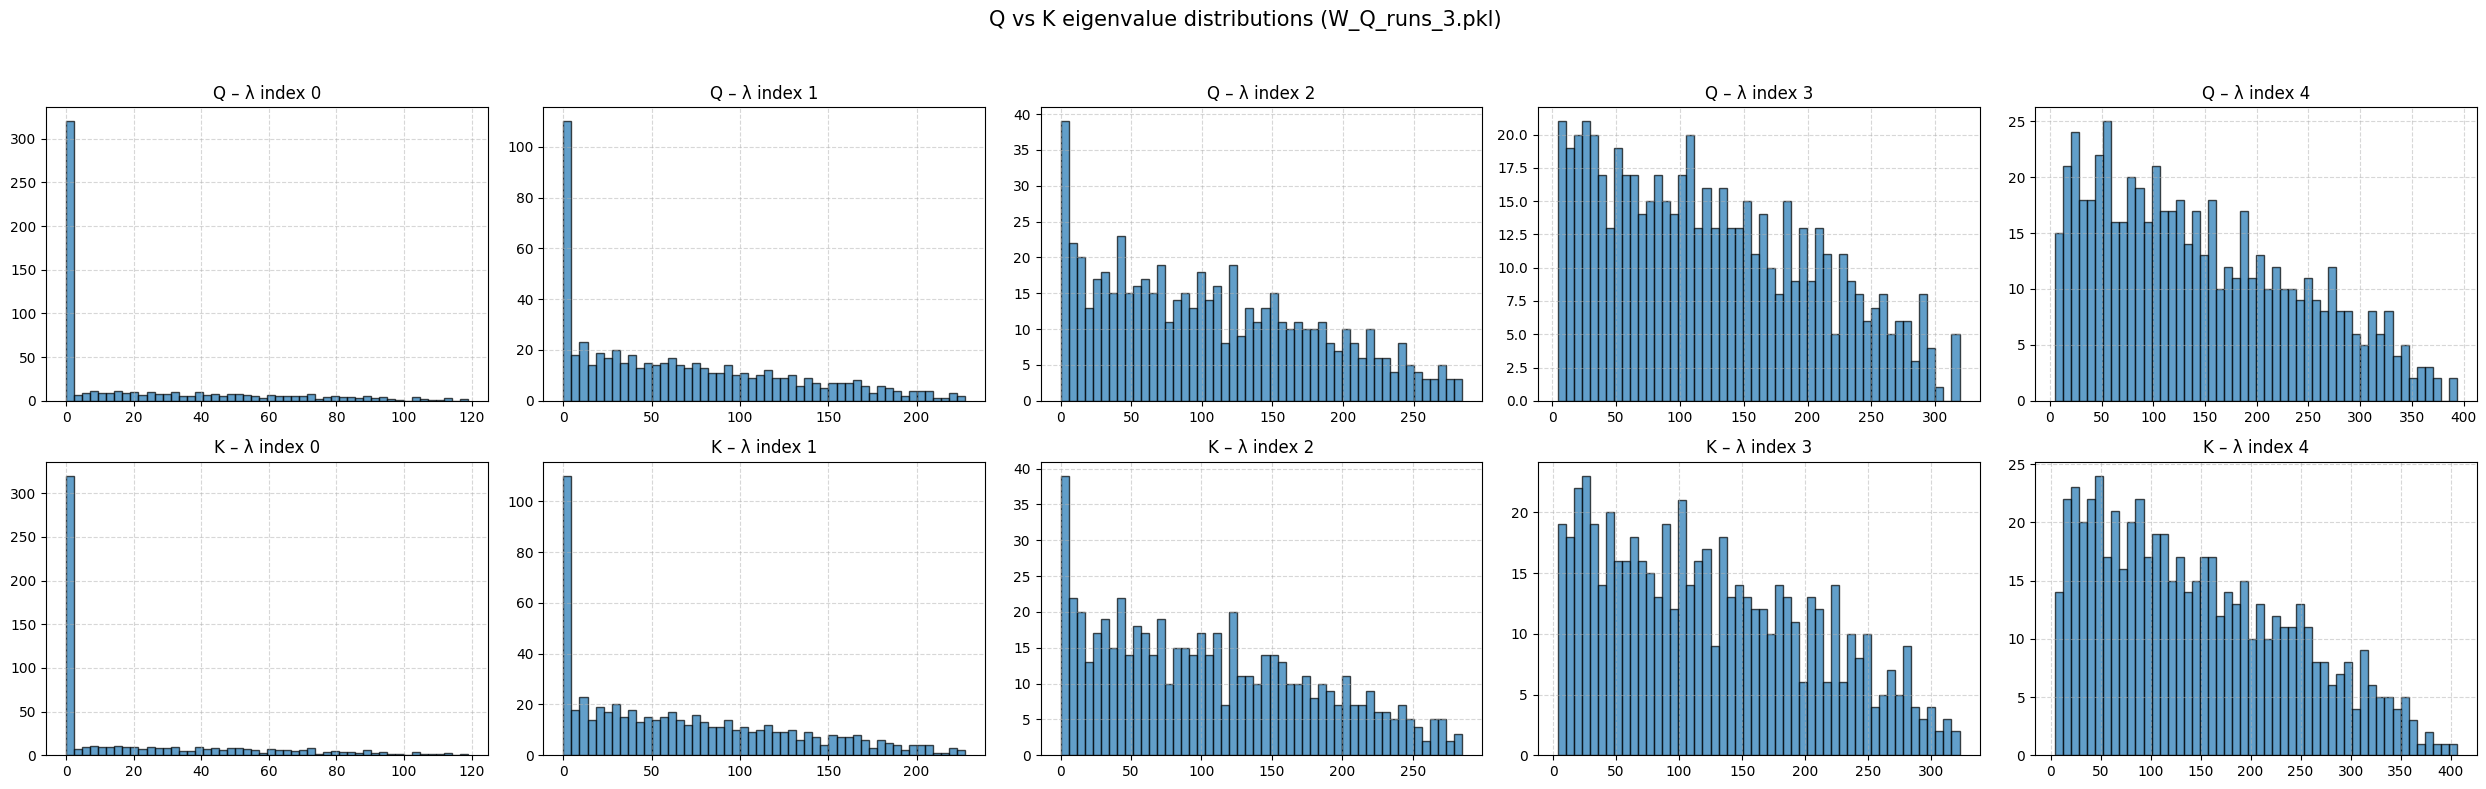


Comparing Q vs K for W_Q_runs_4.pkl


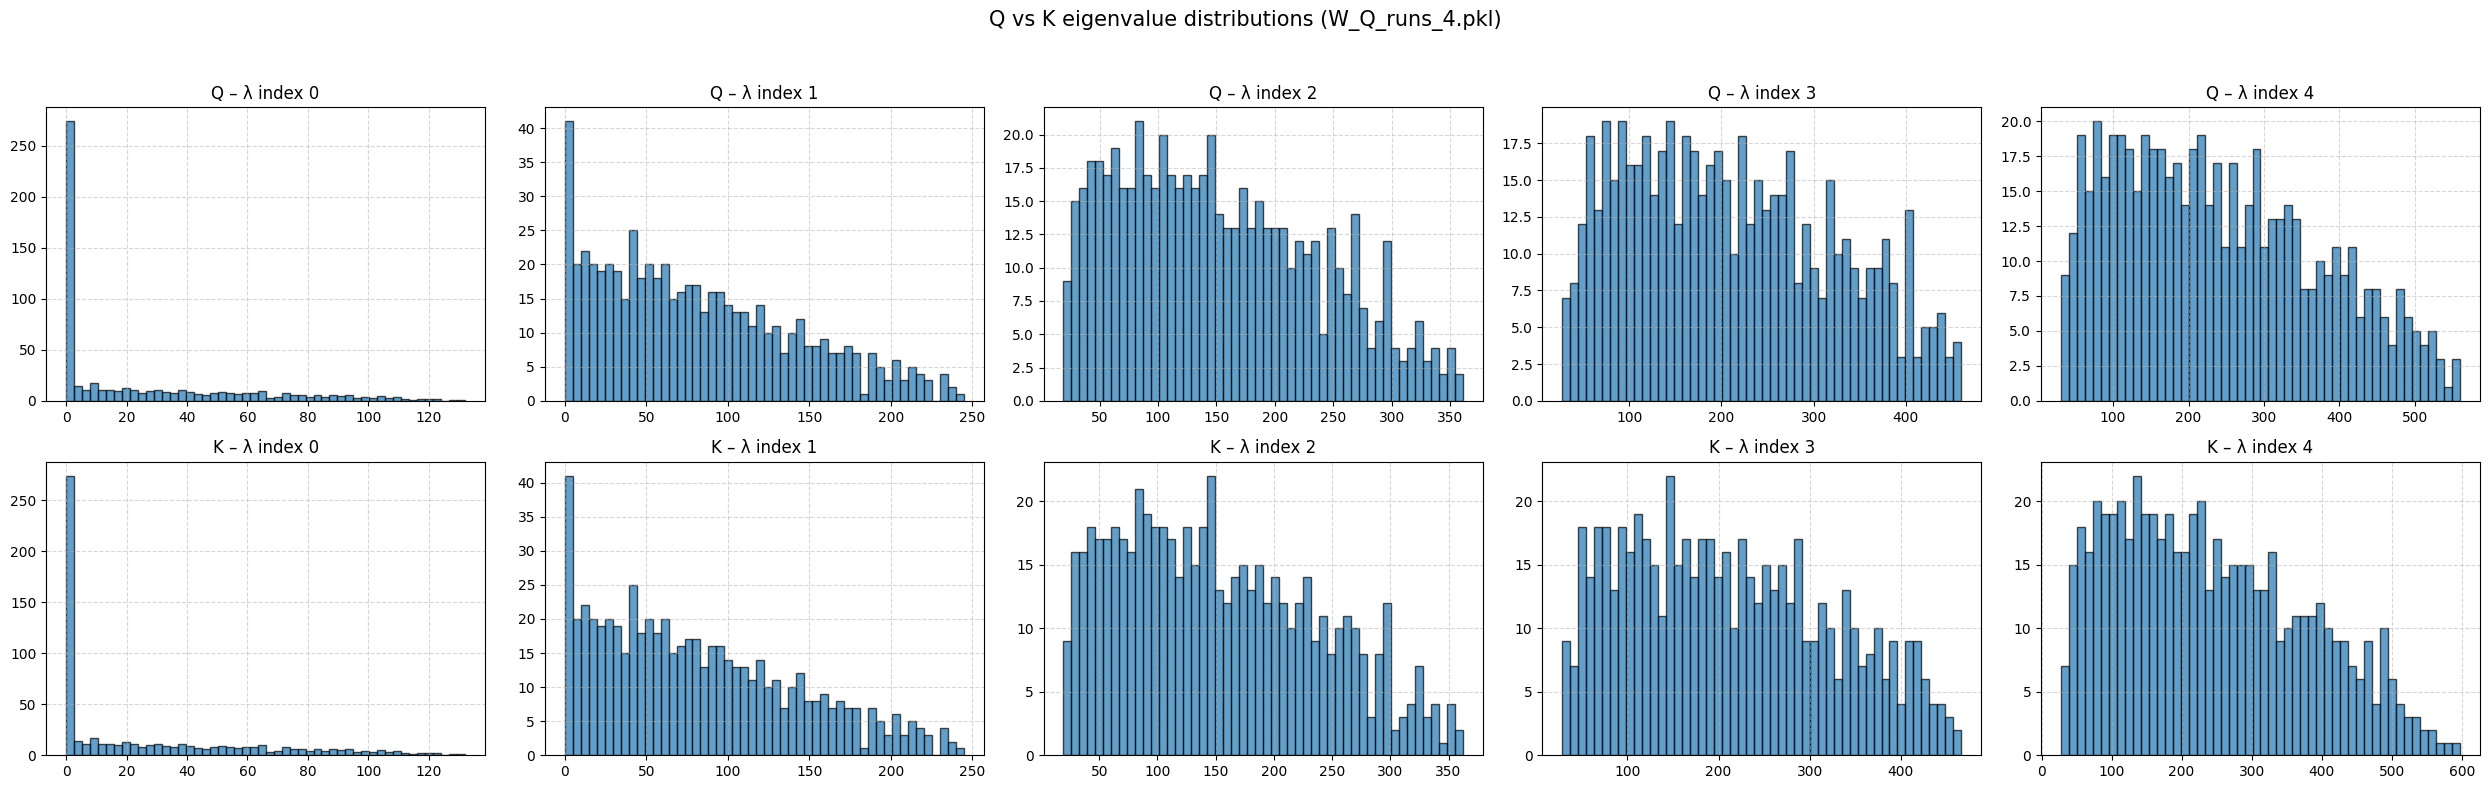


Comparing Q vs K for W_Q_runs_5.pkl


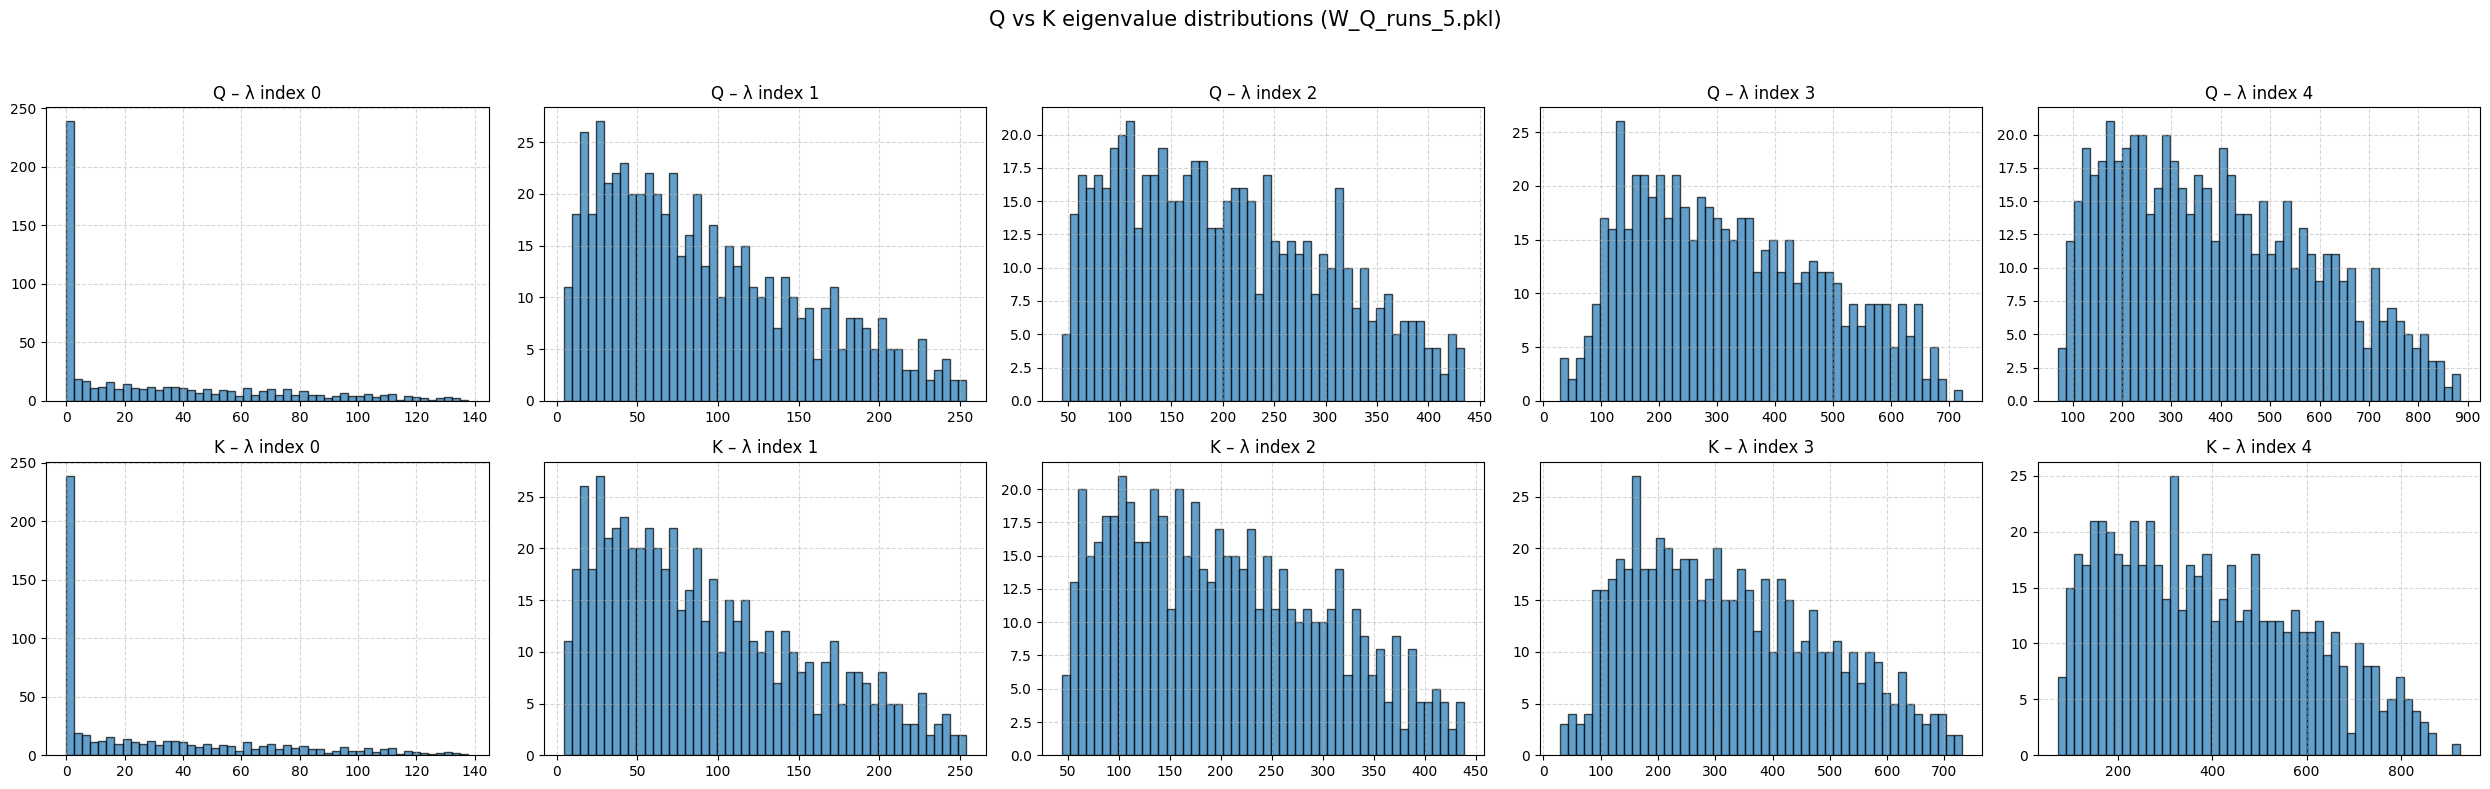


Comparing Q vs K for W_Q_runs_6.pkl


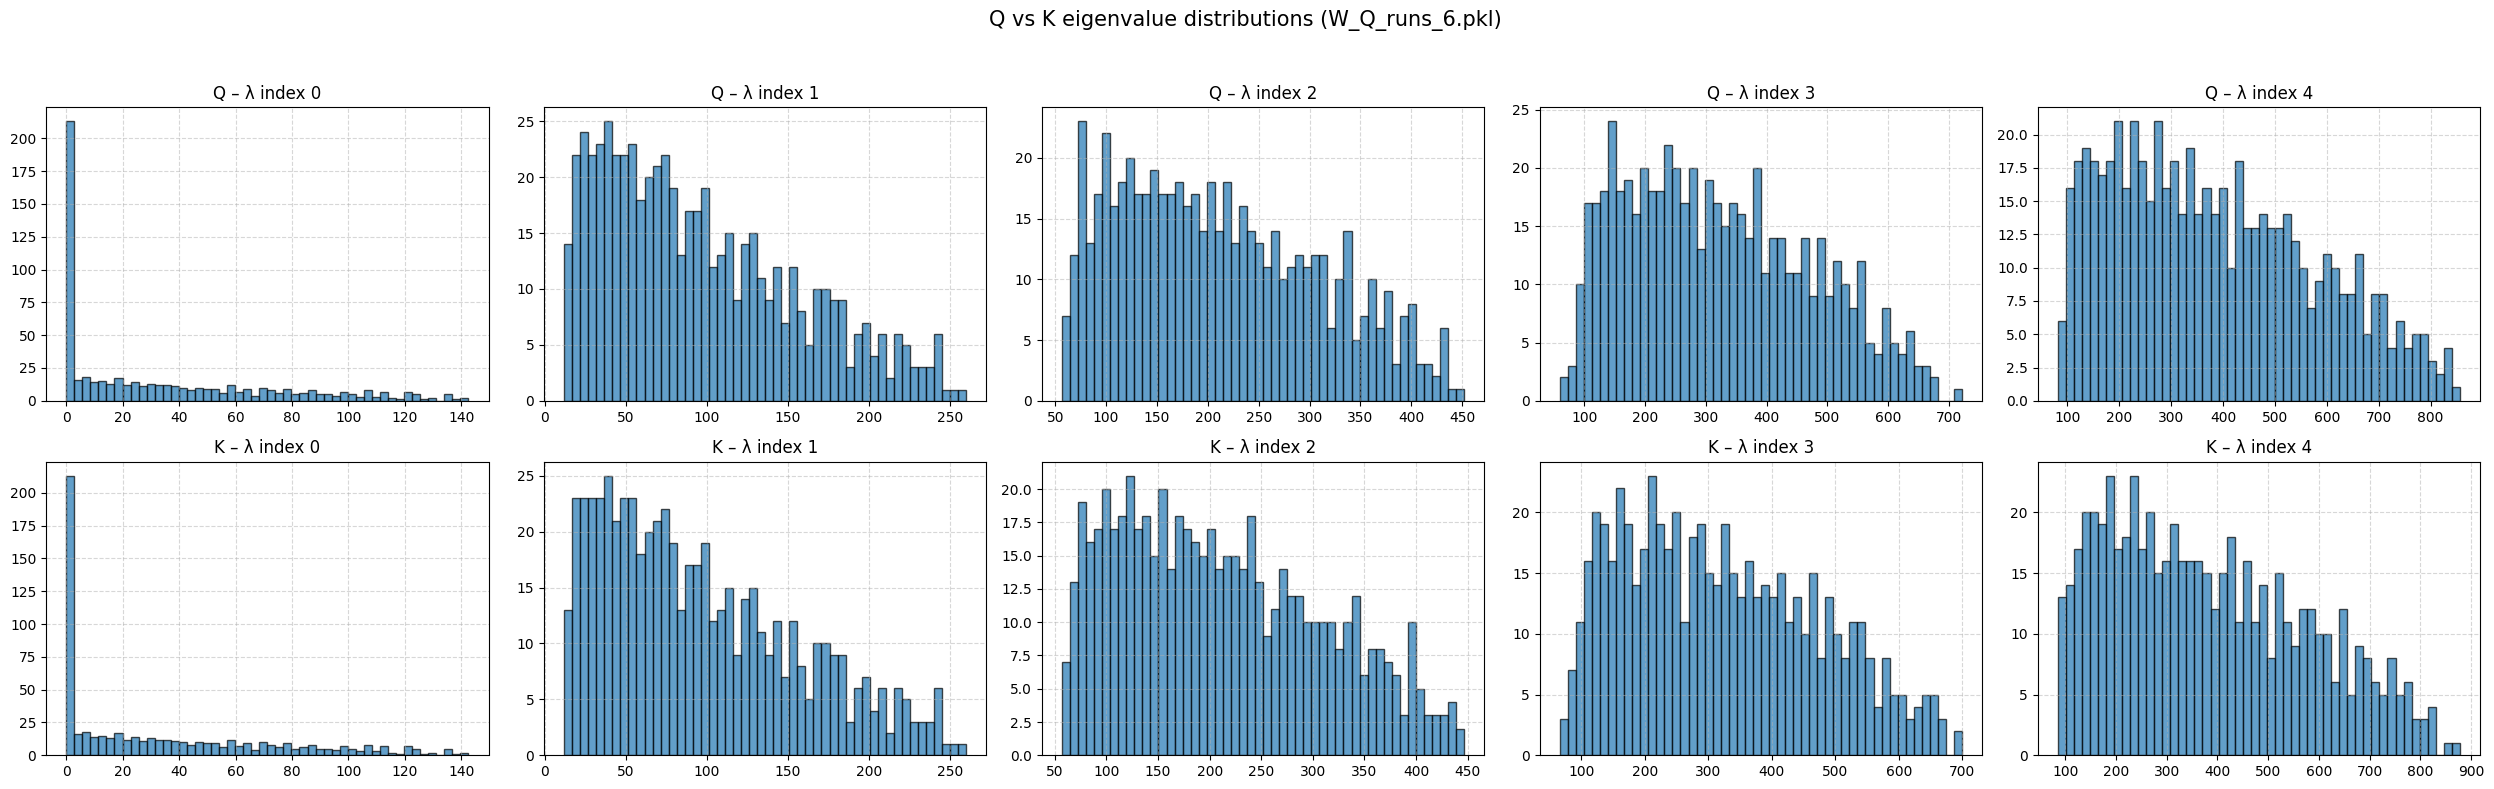


Comparing Q vs K for W_Q_runs_7.pkl


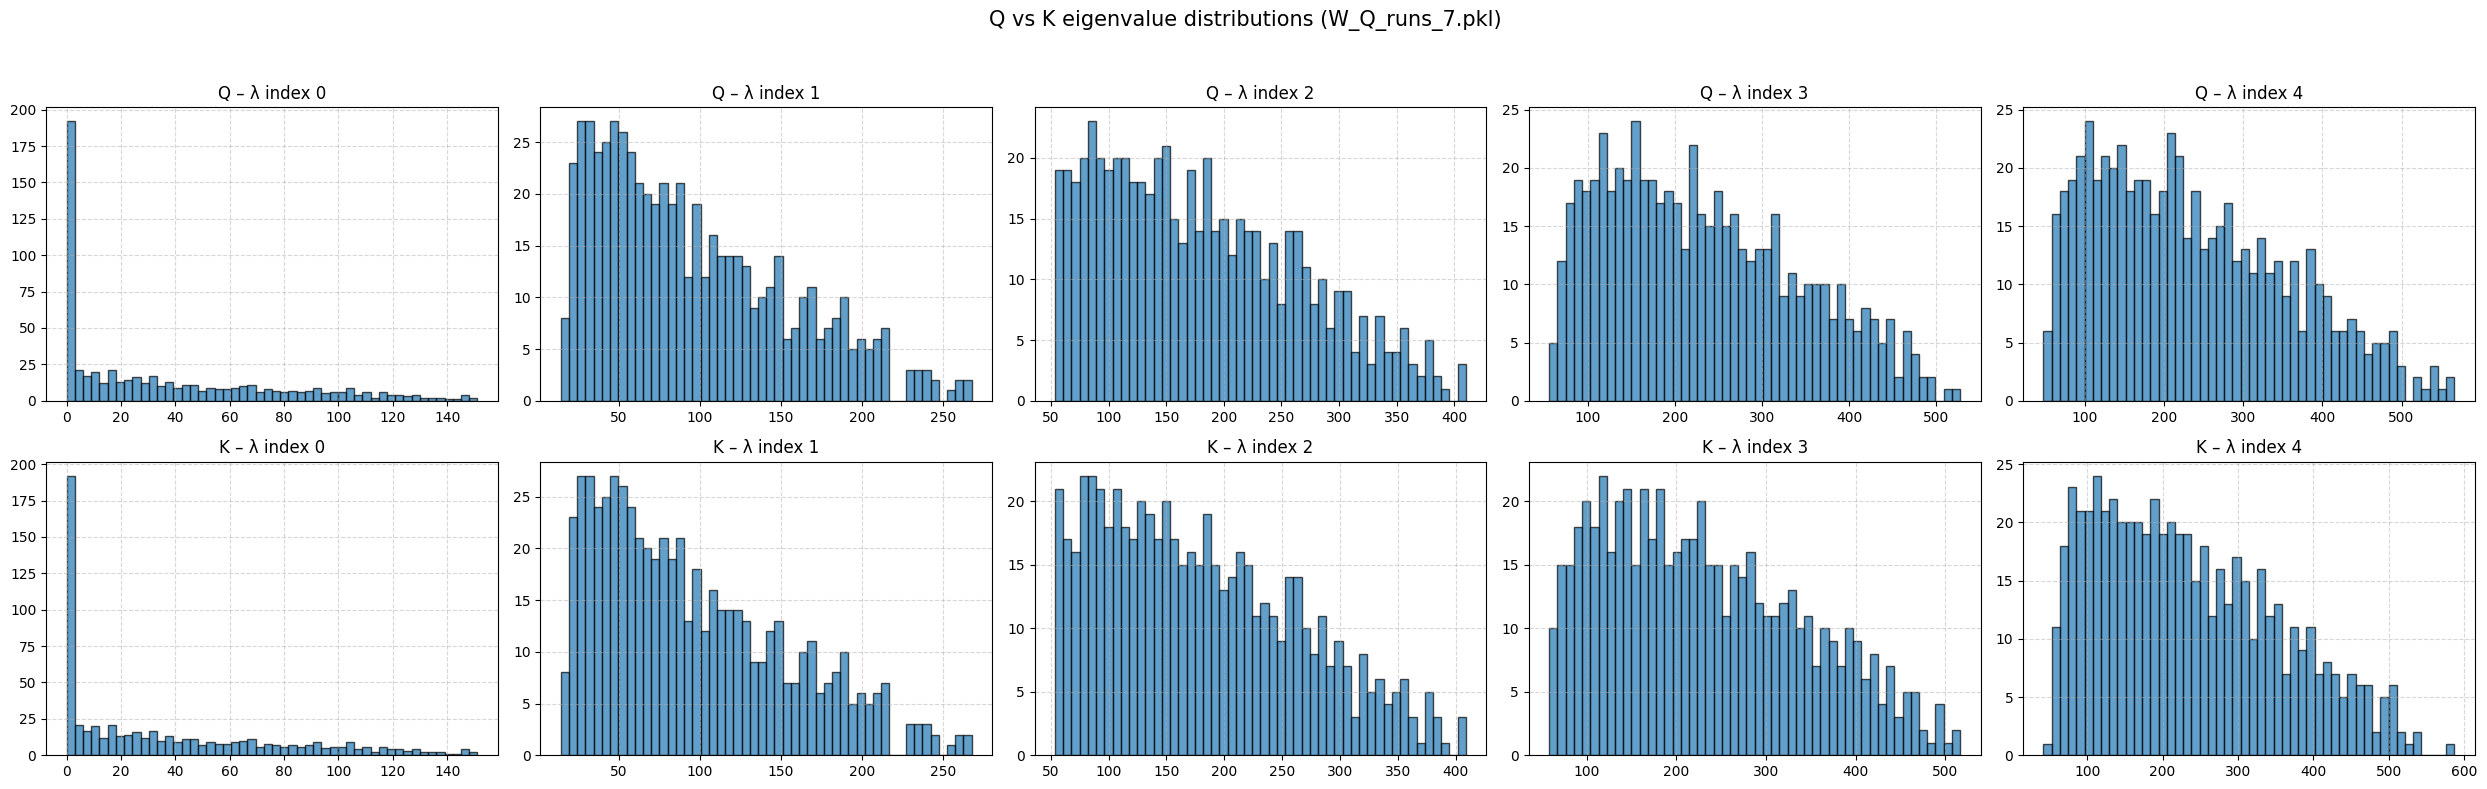


Comparing Q vs K for W_Q_runs_8.pkl


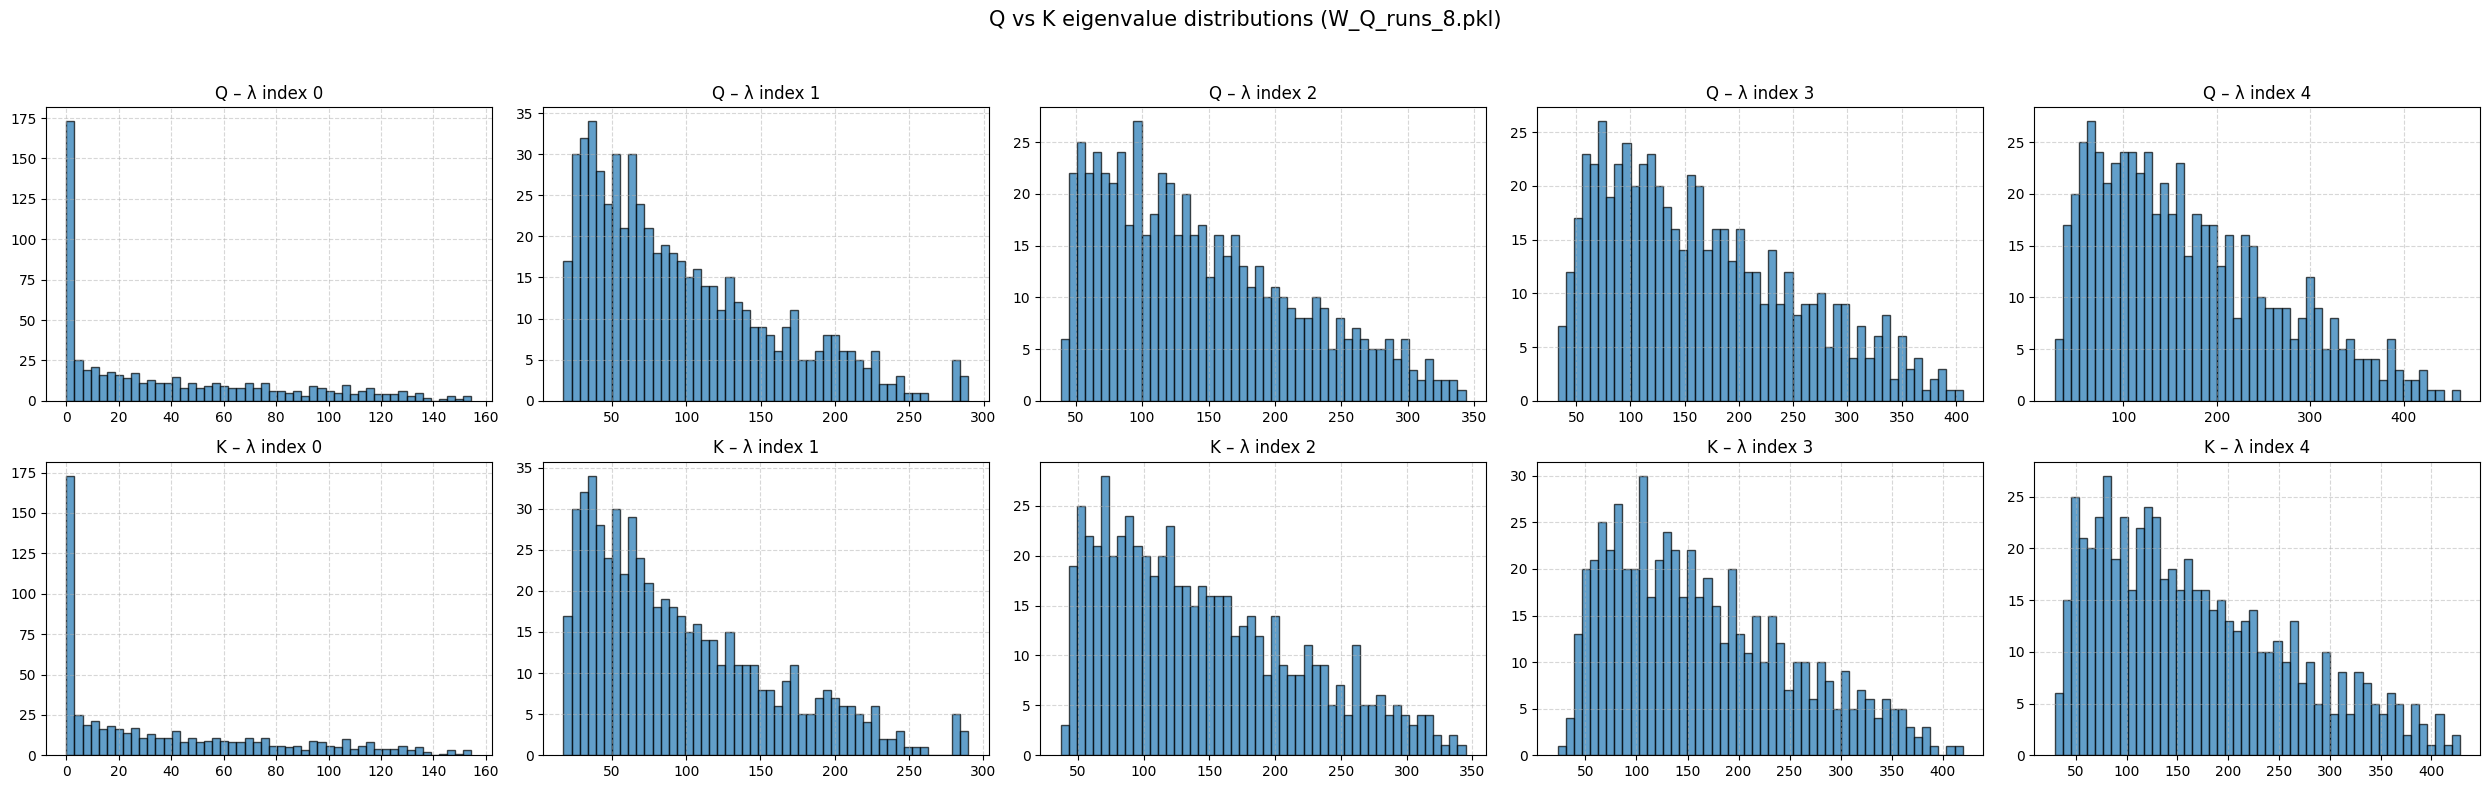


Comparing Q vs K for W_Q_runs_9.pkl


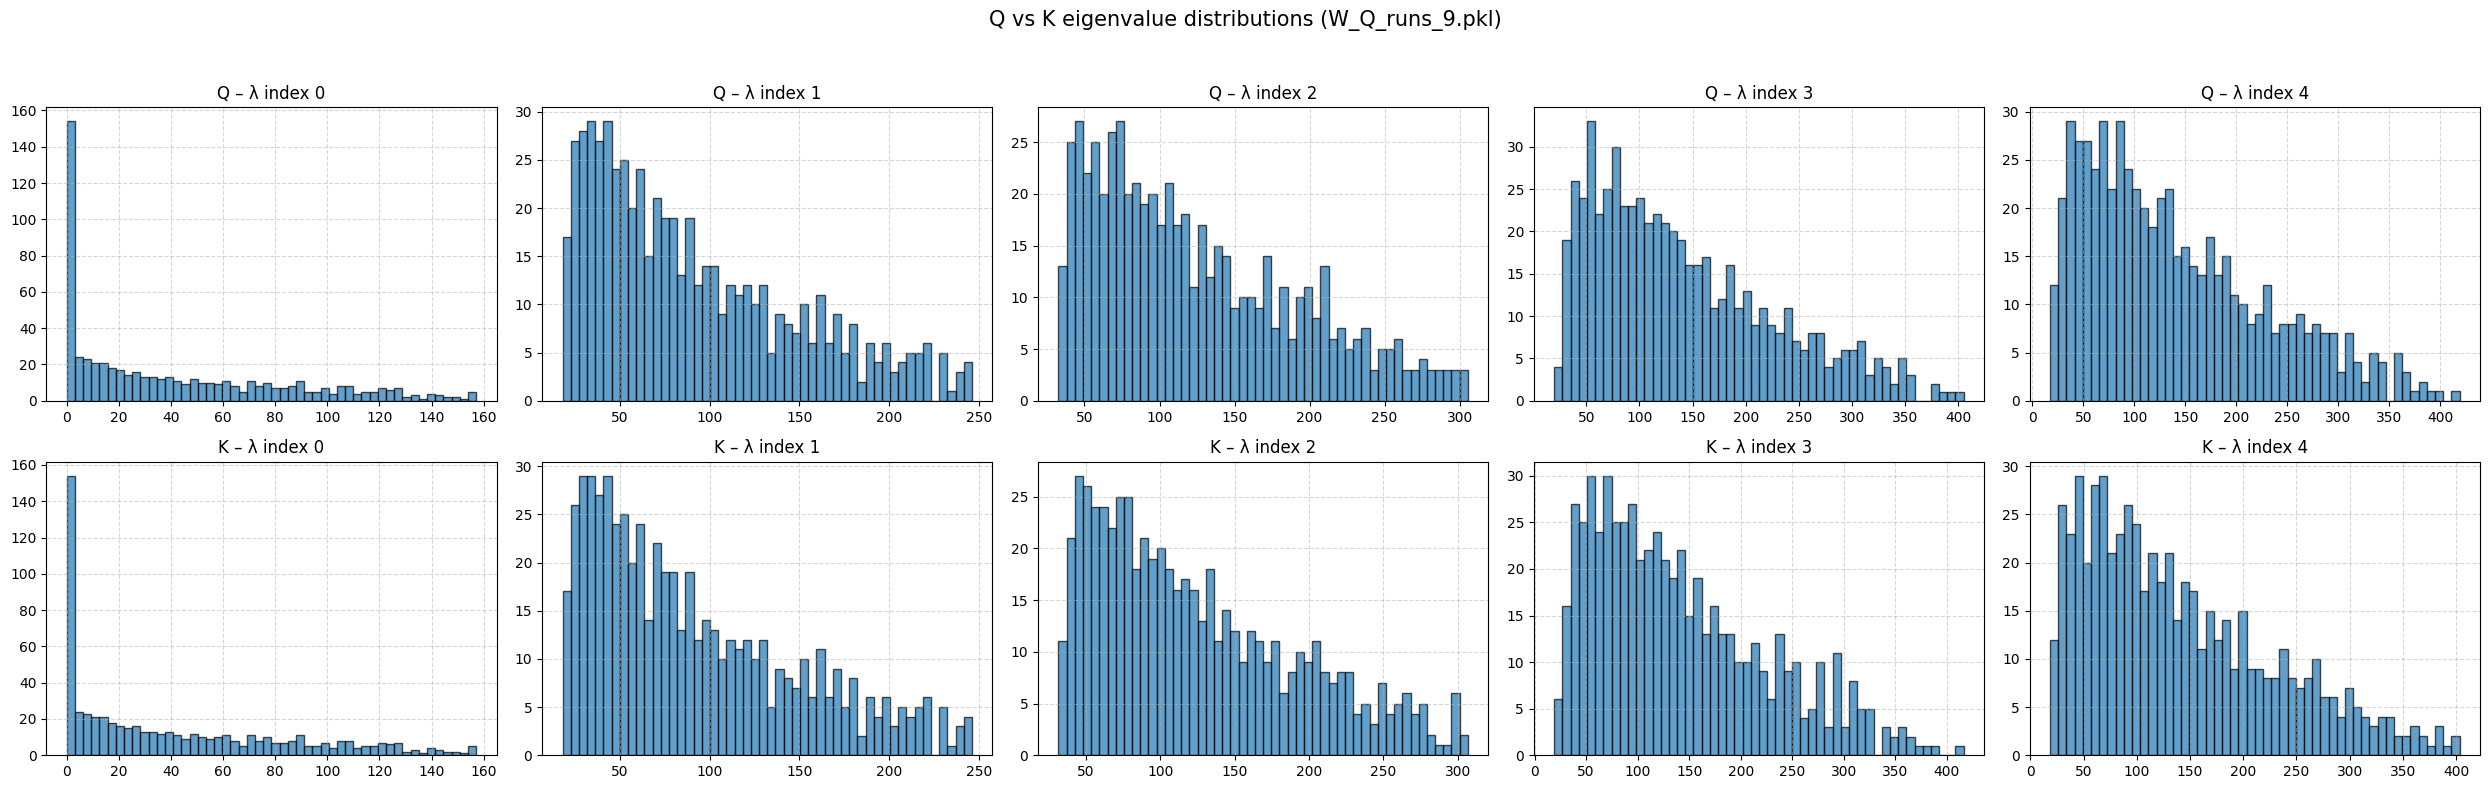

In [49]:
# --- Optional: side-by-side comparison if both Q and K exist for same index ---
for q_file, k_file in zip(pkl_Q_files, pkl_K_files):
    print(f"\nComparing Q vs K for {os.path.basename(q_file)}")

    with open(q_file, "rb") as fq, open(k_file, "rb") as fk:
        Q_runs_all = pickle.load(fq)
        K_runs_all = pickle.load(fk)

    num_lambda = min(len(Q_runs_all), len(K_runs_all))
    fig, axes = plt.subplots(2, num_lambda, figsize=(5*num_lambda, 8), squeeze=False)

    for i in range(num_lambda):
        # Q
        eigvals_Q = np.concatenate([np.linalg.eigvalsh(W @ W.T) for W in Q_runs_all[i]])
        axes[0, i].hist(eigvals_Q, bins=50, alpha=0.7, edgecolor='black')
        axes[0, i].set_title(f"Q – λ index {i}")
        axes[0, i].grid(True, linestyle="--", alpha=0.5)

        # K
        eigvals_K = np.concatenate([np.linalg.eigvalsh(W @ W.T) for W in K_runs_all[i]])
        axes[1, i].hist(eigvals_K, bins=50, alpha=0.7, edgecolor='black')
        axes[1, i].set_title(f"K – λ index {i}")
        axes[1, i].grid(True, linestyle="--", alpha=0.5)

    fig.suptitle(f"Q vs K eigenvalue distributions ({os.path.basename(q_file)})", fontsize=15)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()